In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
data= pd.read_csv('churn_prediction.csv')
data.head()

customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male         0.0  self_employed   187.0   
1            2     2348   35   Male         0.0  self_employed     NaN   
2            4     2194   31   Male         0.0       salaried   146.0   
3            5     2329   90    NaN         NaN  self_employed  1020.0   
4            6     1579   42   Male         2.0  self_employed  1494.0   

   customer_nw_category  branch_code  current_balance  ...  \
0                     2          755          1458.71  ...   
1                     2         3214          5390.37  ...   
2                     2           41          3913.16  ...   
3                     2          582          2291.91  ...   
4                     3          388           927.72  ...   

   average_monthly_balance_prevQ  average_monthly_balance_prevQ2  \
0                        1458.71                         1449.07   
1                        7799.26                        12419.41   
2                        4910.17                         2815.94   
3                        2084.54                         1006.54   
4                        1643.31                         1871.12   

   current_month_credit  previous_month_credit  current_month_debit  \
0                  0.20                   0.20                 0.20   
1                  0.56                   0.56              5486.27   
2                  0.61                   0.61              6046.73   
3                  0.47                   0.47                 0.47   
4                  0.33                 714.61               588.62   

   previous_month_debit  current_month_balance  previous_month_balance  churn  \
0                  0.20                1458.71                 1458.71      0   
1                100.56                6496.78                 8787.61      0   
2                259.23                5006.28                 5070.14      0   
3               2143.33                2291.91                 1669.79      1   
4               1538.06                1157.15                 1677.16      1   

   last_transaction  
0        2019-05-21  
1        2019-11-01  
2               NaT  
3        2019-08-06  
4        2019-11-03  

[5 rows x 21 columns]

## Data field definitions:

### Source1: Customer information

**customer_id**: Customer ID \
**vintage**: Association of the customer with the bank in number of days \
**age**- Age of the customer \
**gender**- Gender of the customer \
**dependents**- Number of dependents \
**occupation**- Occupation of the customer \
**city**- City of the customer (anonymized into codes) 


### Source2: Transaction data from the bank

**current_balance**- Balance as of today \
**current_month_credit**- Total Credit Amount current month \
**current_month_debit**- Total Debit Amount current month \
**current_month_balance**- Average Balance of current month \
**previous_month_end_balance**- End of Month Balance of previous month\
**previous_month_credit**- Total Credit Amount previous month \
**previous_month_debit**- Total Debit Amount previous month \
**previous_month_balance**- Average Balance of previous month \
**average_monthly_balance_prevQ**- Average balances in Previous Quarter \
**average_monthly_balance_prevQ2**- Average balances in previous to previous quarter \
**current_nw_category**- Net worth of customer (3:Low, 2:Medium, 1:High) 

### Source3: Bank branch
**branch_code**- Branch code for customer account \
**last_transaction**- Day the last transaction was done

## Checking data types

In [3]:
data.shape

(28382, 21)

In [4]:
data.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')

In [5]:
#Integer data type
data.dtypes[data.dtypes== 'int64']

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object

Summary:

*    **Customer id** are a unique number assigned to customers. It is **Okay as Integer**.

*    **branch code** again represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage** are also numbers and hence we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.

In [6]:
#Data conversion
data['branch_code']= data['branch_code'].astype('category')
data['customer_nw_category']= data['customer_nw_category'].astype('category')
data['churn']= data['churn'].astype('category')

#checking the integer types again
data.dtypes[data.dtypes=='int64']

customer_id    int64
vintage        int64
age            int64
dtype: object

In [7]:
#Float data type
data.dtypes[data.dtypes== 'float']

dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object

Summary:

*    **dependents** is expected to be a whole number. **Should be changed to integer type**

*    **city** variable is also a unique code of a city represented by some interger number. **Should be converted to Category type**

*    Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [8]:
#Data conversion
data['dependents']= data['dependents'].astype('Int64')
data['city']= data['city'].astype('category')

data[['dependents','city']].dtypes

dependents       Int64
city          category
dtype: object

In [9]:
#Object data type

data.dtypes[data.dtypes=='object']

gender              object
occupation          object
last_transaction    object
dtype: object

In [10]:
#We can type cast gender and occupation to categories as well.
data['gender']= data['gender'].astype('category')
data['occupation']= data['occupation'].astype('category')

data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

## Feature extraction

In [27]:
#Creating datetime index for last transaction
date= pd.DatetimeIndex(data['last_transaction'])

In [28]:
#Feature extraction

#day of year when last transaction was done
data['doy_last_trans']= date.dayofyear

#week of year when last transaction was done
data['woy_last_trans']= date.weekofyear

#month of year when last transaction was done
data['moy_last_trans']= date.month

#day of week when last transaction was done
data['dow_last_trans']= date.dayofweek

In [13]:
data[['last_transaction','doy_last_trans','woy_last_trans', 'moy_last_trans', 'dow_last_trans']].head()

last_transaction  doy_last_trans  woy_last_trans  moy_last_trans  \
0       2019-05-21           141.0            21.0             5.0   
1       2019-11-01           305.0            44.0            11.0   
2              NaT             NaN             NaN             NaN   
3       2019-08-06           218.0            32.0             8.0   
4       2019-11-03           307.0            44.0            11.0   

   dow_last_trans  
0             1.0  
1             4.0  
2             NaN  
3             1.0  
4             6.0

In [14]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_last_trans                     float64
woy_last_trans                     float64
moy_last_trans                     float64
dow_last_tr

In [15]:
data.customer_id.dtypes== 'int'

True

In [16]:
numerical_cols= [cols for cols in data.columns if (data[cols].dtypes== 'int') | (data[cols].dtypes== 'float64')]
numerical_cols

['customer_id',
 'vintage',
 'age',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance',
 'doy_last_trans',
 'woy_last_trans',
 'moy_last_trans',
 'dow_last_trans']

In [17]:
#observation with minimum current balance
data[data['current_balance']== data['current_balance'].min()]

customer_id  vintage  age gender  dependents occupation    city  \
12608        13467     2140   80   Male           0    retired  1096.0   

      customer_nw_category branch_code  current_balance  ...  \
12608                    1          27         -5503.96  ...   

       previous_month_credit  current_month_debit  previous_month_debit  \
12608                2680.04             15229.44               7859.37   

       current_month_balance  previous_month_balance  churn  doy_last_trans  \
12608                1050.17                 2002.97      1           360.0   

       woy_last_trans  moy_last_trans dow_last_trans  
12608            52.0            12.0            3.0  

[1 rows x 24 columns]

Minimum of current balance is -5503

In [18]:
#observation with maximum current month debit
data[data['current_month_debit']== data['current_month_debit'].max()]

customer_id  vintage  age gender  dependents occupation    city  \
24095        25712     1902   90   Male           0    retired  1020.0   

      customer_nw_category branch_code  current_balance  ...  \
24095                    2           5             46.5  ...   

       previous_month_credit  current_month_debit  previous_month_debit  \
24095                   0.21           7637857.36                  0.21   

       current_month_balance  previous_month_balance  churn  doy_last_trans  \
24095                8399.62                24270.54      1           347.0   

       woy_last_trans  moy_last_trans dow_last_trans  
24095            50.0            12.0            4.0  

[1 rows x 24 columns]

Maximum of current month debit is 7637857

In [19]:
data[numerical_cols].max()

customer_id                          30301.00
vintage                               2476.00
age                                     90.00
current_balance                    5905904.03
previous_month_end_balance         5740438.63
average_monthly_balance_prevQ      5700289.57
average_monthly_balance_prevQ2     5010170.10
current_month_credit              12269845.39
previous_month_credit              2361808.29
current_month_debit                7637857.36
previous_month_debit               1414168.06
current_month_balance              5778184.77
previous_month_balance             5720144.50
doy_last_trans                         365.00
woy_last_trans                          52.00
moy_last_trans                          12.00
dow_last_trans                           6.00
dtype: float64

In [20]:
#Printing the rage of all numerical columns
for col in numerical_cols:
    print(f"The range of {col}: [{data[col].min()}, {data[col].max()}]")

The range of customer_id: [1, 30301]
The range of vintage: [73, 2476]
The range of age: [1, 90]
The range of current_balance: [-5503.96, 5905904.03]
The range of previous_month_end_balance: [-3149.57, 5740438.63]
The range of average_monthly_balance_prevQ: [1428.69, 5700289.57]
The range of average_monthly_balance_prevQ2: [-16506.1, 5010170.1]
The range of current_month_credit: [0.01, 12269845.39]
The range of previous_month_credit: [0.01, 2361808.29]
The range of current_month_debit: [0.01, 7637857.36]
The range of previous_month_debit: [0.01, 1414168.06]
The range of current_month_balance: [-3374.18, 5778184.77]
The range of previous_month_balance: [-5171.92, 5720144.5]
The range of doy_last_trans: [1.0, 365.0]
The range of woy_last_trans: [1.0, 52.0]
The range of moy_last_trans: [1.0, 12.0]
The range of dow_last_trans: [0.0, 6.0]


#### KDE plot for age of people who churned

In [21]:
churn_age= data['age'][data['churn']==1]
churn_age

3        90
4        42
12       73
14       48
16       49
         ..
28368    78
28372    49
28374    55
28379    47
28381    18
Name: age, Length: 5260, dtype: int64

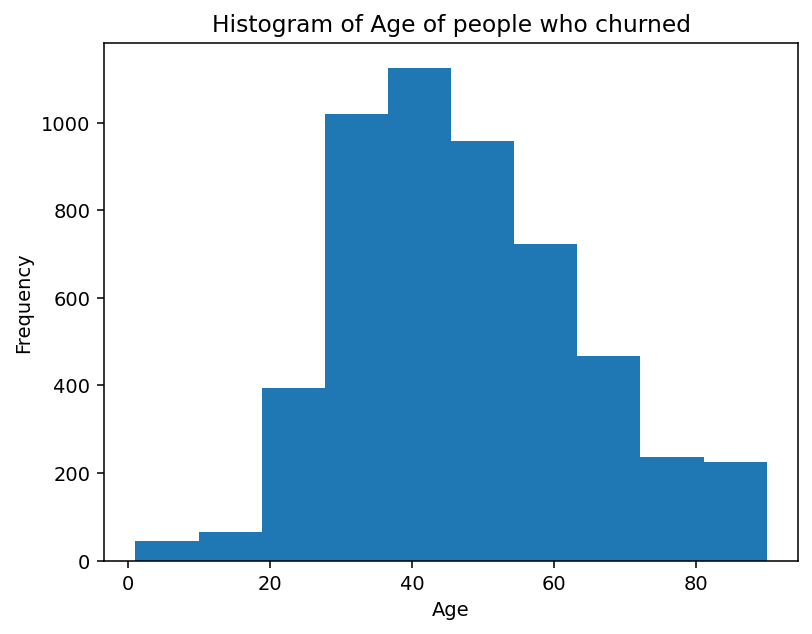

In [22]:
plt.figure(dpi=140)
plt.hist(churn_age, bins=10)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age of people who churned")
plt.show()

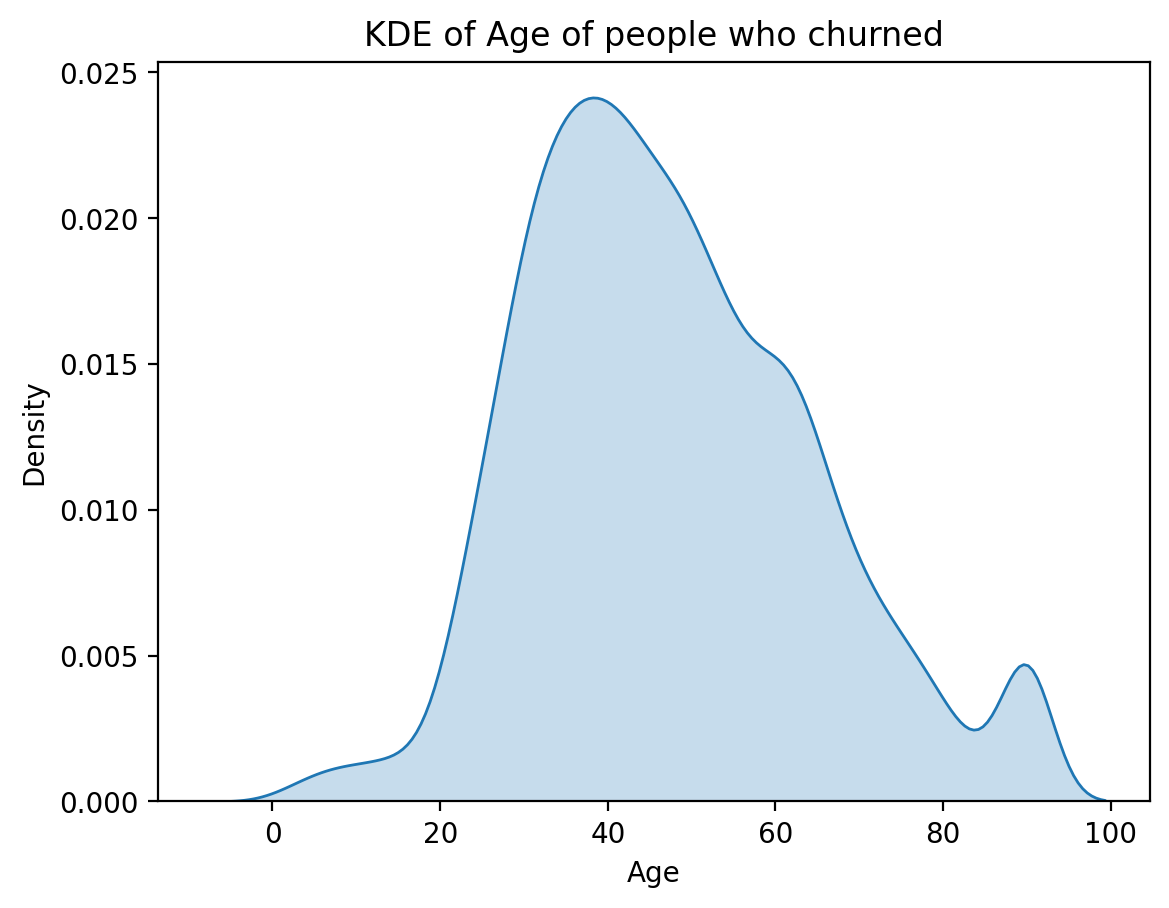

In [23]:
plt.figure(dpi=200)
sns.kdeplot(churn_age, shade= True)
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE of Age of people who churned")
plt.show()

In [24]:
#calculating mean, median and 1 standard deviation
mean= churn_age.mean()
median= churn_age.median()
std_dev= churn_age.mean() - churn_age.std(), churn_age.mean() + churn_age.std()
mean, median, std_dev

(47.461216730038025, 45.0, (30.285242583286085, 64.63719087678996))

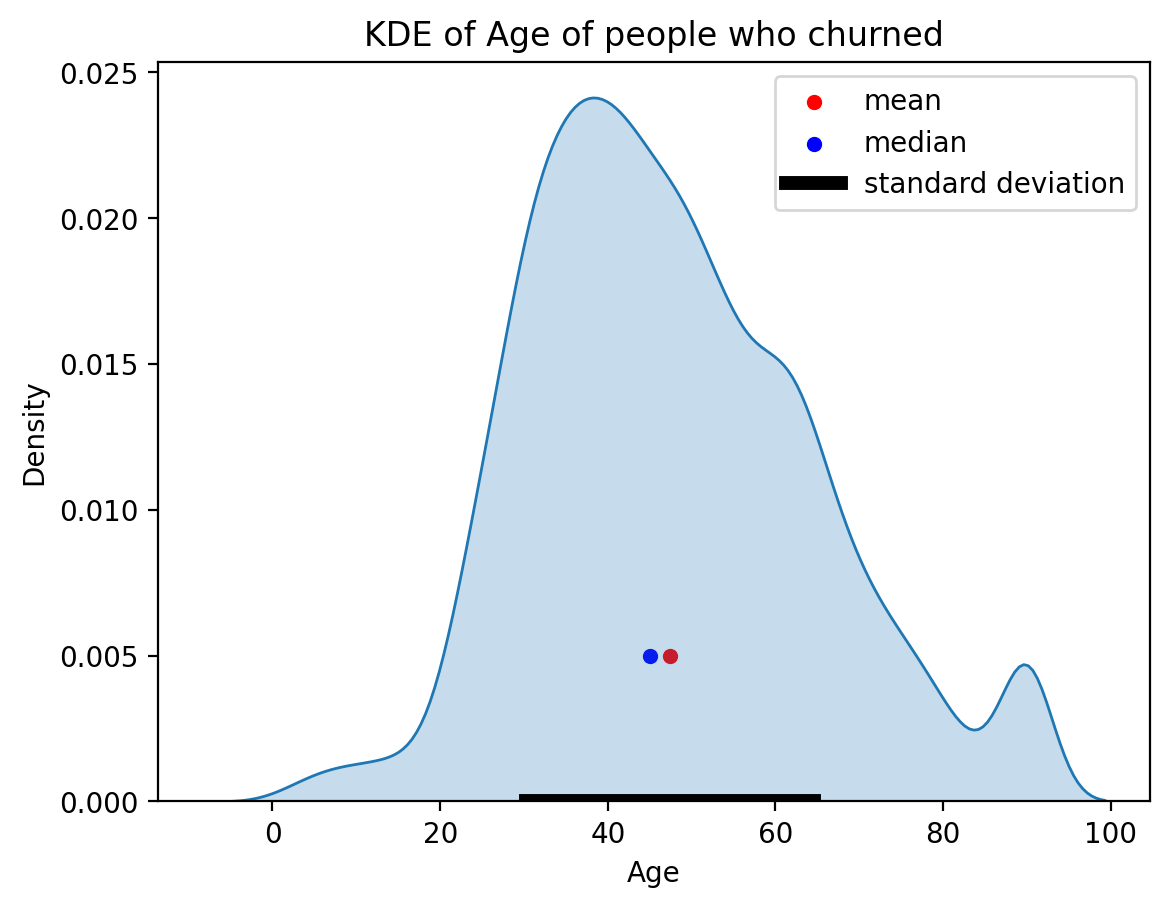

In [25]:
plt.figure(dpi=200)
sns.scatterplot(x=[mean], y=[0.005], color='red', label= 'mean')
sns.scatterplot(x=[median], y=[0.005], color='blue', label= 'median')
sns.lineplot(x=std_dev, y=[0,0], color='black', linewidth= 5.0, label='standard deviation')
sns.kdeplot(churn_age, shade= True, label='age')
plt.xlabel("Age")
plt.ylabel("Density")
plt.title("KDE of Age of people who churned")
plt.show()

In [26]:
import statsmodels.api as sm

#### Q-Q plot of Age to check normality

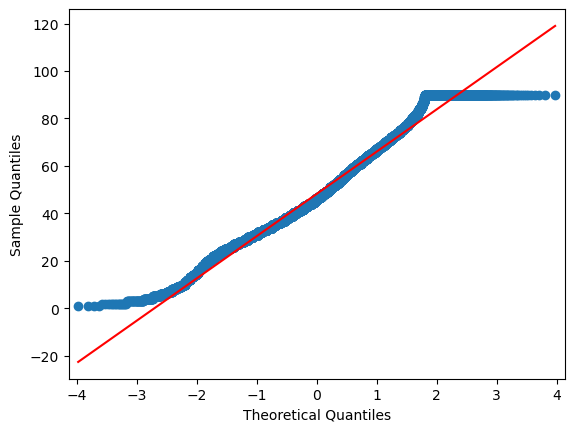

In [27]:
sm.qqplot(data.age, line='s')
plt.show()

- Larger values are not as large/extreme as expected from a normal distribution. 
- Smaller values are also not as small/extreme as expected from a normal distribution.



In [28]:
data['age'].skew()

0.33058929557517264

In [29]:
data['age'].kurtosis()

-0.16866785691275865

- Kurtosis value is close to zero.
- Tails are not as dense compared to a normal distribution. There are less values along tails (Thinner tails).

### Vintage

In [30]:
v_mean= data['vintage'].mean()
v_median= data['vintage'].median()
v_mode= data['vintage'].mode()

v_mean, v_median, v_mode

(2091.1441054189277,
 2154.0,
 0    2251
 1    2260
 Name: vintage, dtype: int64)

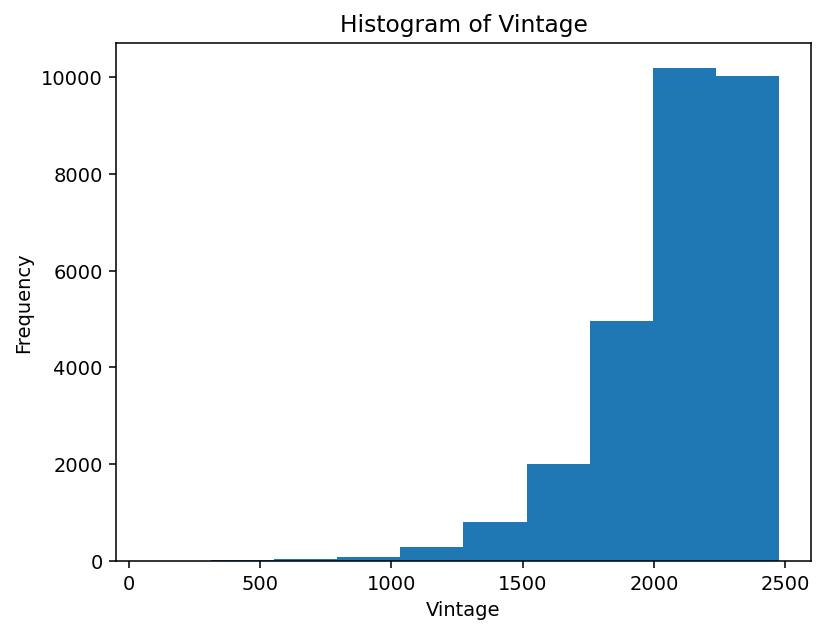

In [31]:
plt.figure(dpi=140)
plt.hist(data['vintage'], bins=10)
plt.xlabel("Vintage")
plt.ylabel("Frequency")
plt.title("Histogram of Vintage")
plt.show()

- Left skewed distribution for vintage of customers. 

In [32]:
data['vintage'].kurtosis()

2.7234245375227926

- Positive kurtosis indicates it is a leptokurtic distribution (Thick tails).
- High presence of extreme values

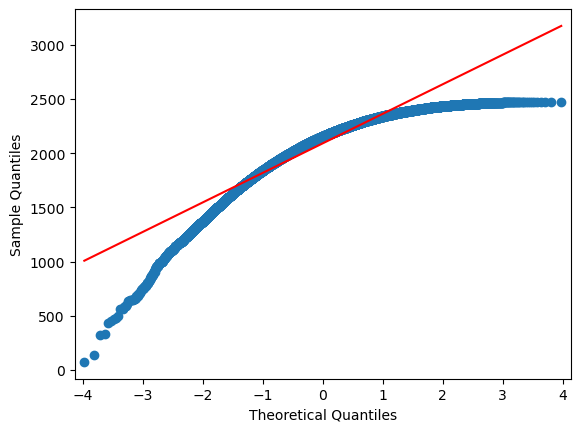

In [33]:
#We can simply confirm this using a q-q plot
sm.qqplot(data['vintage'], line= 's')
plt.show()

## Univariate Numerical variable analysis

In [34]:
# Numerical datatypes
data.select_dtypes(include=['int64','float64','Int64']).dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_last_trans                    float64
woy_last_trans                    float64
moy_last_trans                    float64
dow_last_trans                    float64
dtype: object

In [35]:
# segregating variables into groups
customer_details = ['customer_id','age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_last_trans','woy_last_trans','moy_last_trans','dow_last_trans']

In [36]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(x=data[i], shade=True)
    sns.lineplot(x=points, y=[0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x=[mini,maxi], y=[0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x=[mean], y=[0], color = 'red', label = "mean")
    sns.scatterplot(x=[median], y=[0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('within 1 std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### Customer details

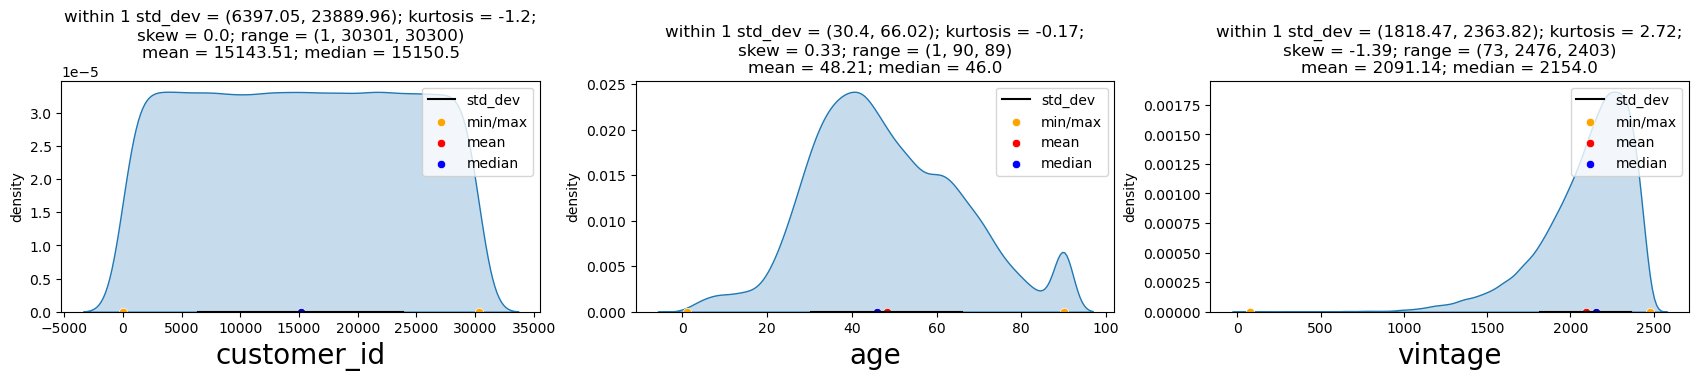

In [37]:
UVA_numeric(data,customer_details)

**Summary of Customer_Information:**
*    **customer_id**:
     * variable is **unique for every customer, Hence uniform** distribution.
     * This variable **does not contribute any information**
     * Can be eliminated from data

*    **age**:\
    *    Median Age = 46\
    *    **Most customers age between 30 to 66** \
    *    skewness +0.33 : customer age is **negligibly biased towards younger age** \
    *    **kurtosis = -0.17**; very less likely to have extreme/outlier values. 
*    **vintage:** \
    *    Most customers joined between 1818 and 2364 days from the day of data extraction.\
    *    **skewness** -1.42 : this is left skewed, **vintage variable is significantly biased towards longer association of customers.**\
    *    **Kurtosis = 2.93**: Extreme values and Outliers are very likely to be present in vintage.

**Things to Investigate Further down the road:**
*    The batch of **high number of very Old Age customers** in age variable.

### Current month

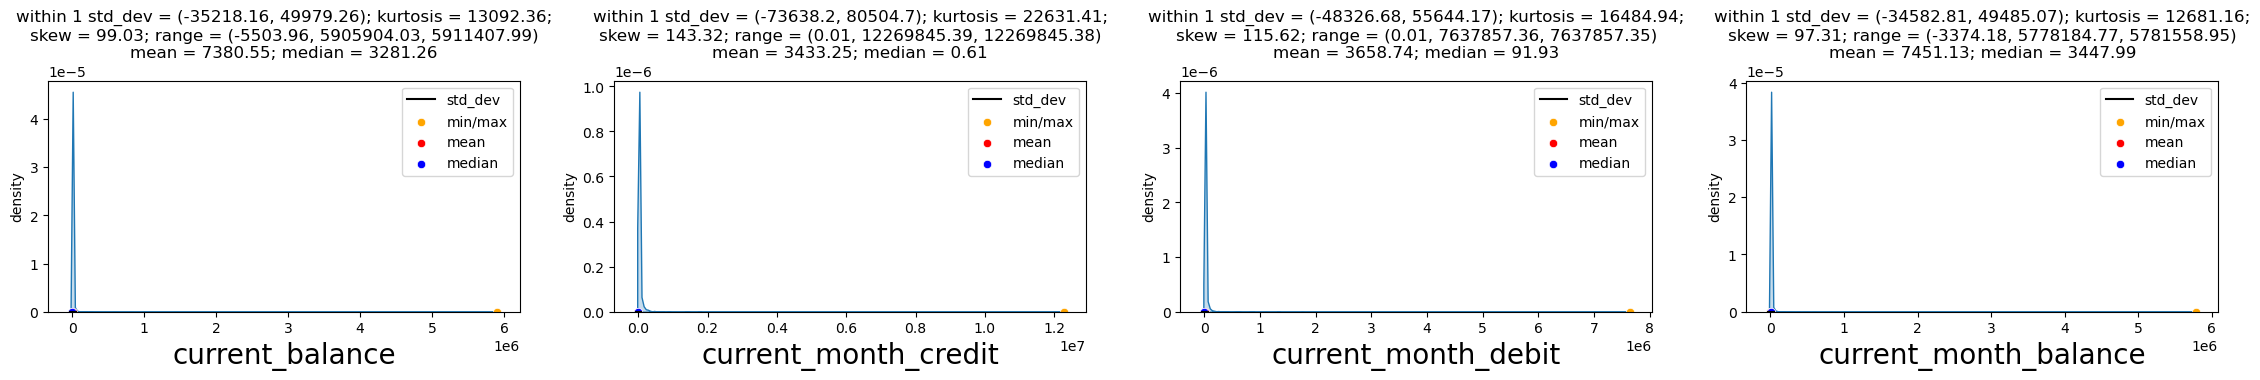

In [38]:
UVA_numeric(data,current_month)

**Summary**
*    Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are present.
*    Median of both current month credit and debit is clearly much lower and give that the range has no negative values, it implies there are lot of customers with very low number of transactions with the bank.

### Removing outliers above 2 SD to visualize these plots

In [39]:
# standard deviation factor
factor = 2

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < (cm_data['current_balance'].mean() + factor*cm_data['current_balance'].std())]
cm_data = cm_data[cm_data['current_month_credit'] < (cm_data['current_month_credit'].mean() + factor*cm_data['current_month_credit'].std())]
cm_data = cm_data[cm_data['current_month_debit'] < (cm_data['current_month_debit'].mean() + factor*cm_data['current_month_debit'].std())]
cm_data = cm_data[cm_data['current_month_balance'] < (cm_data['current_month_balance'].mean() + factor*cm_data['current_month_balance'].std())]

# checking how many points removed
len(data), len(cm_data)

(28382, 26563)

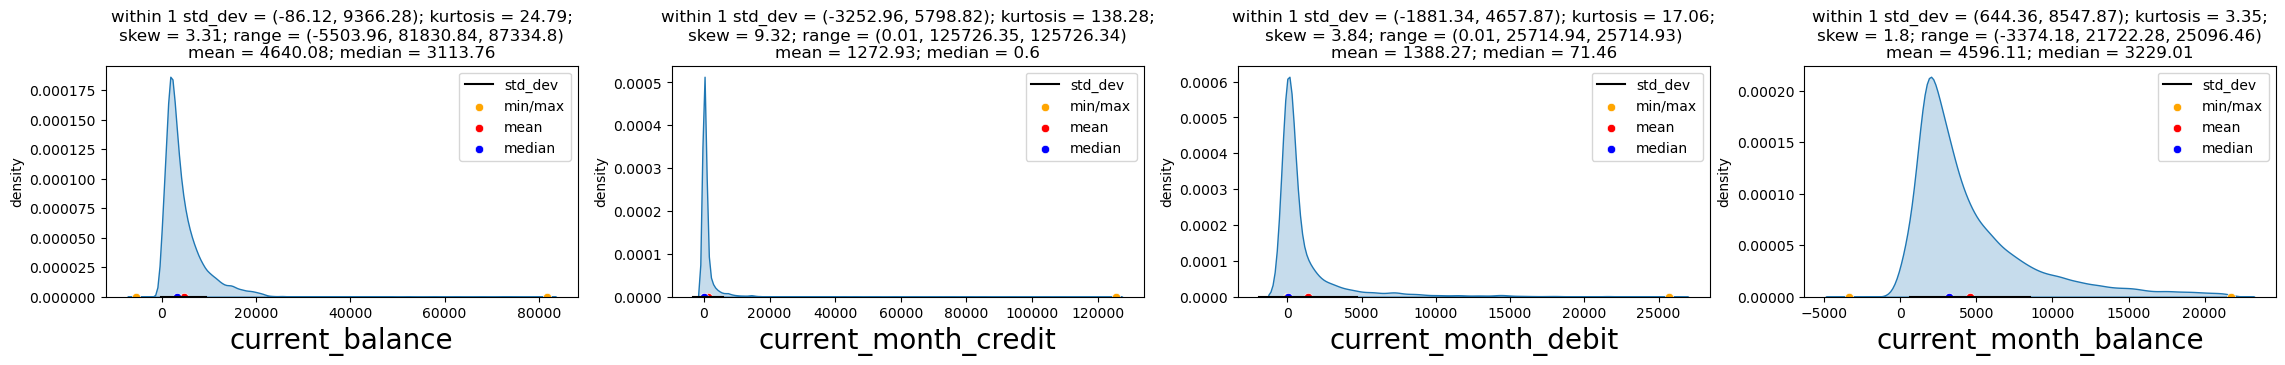

In [40]:
UVA_numeric(cm_data,current_month)

**Summary of current_month**
*    After Removing extreme/outliers, plots are still very skewed.

**Things to investigate further down**
1.    **Is there any common trait/relation between the customers who are performing high transaction credit/debits?**
2.    **Customers who are performing high amount of transactions, are they doing it every month?**

### Previous Month

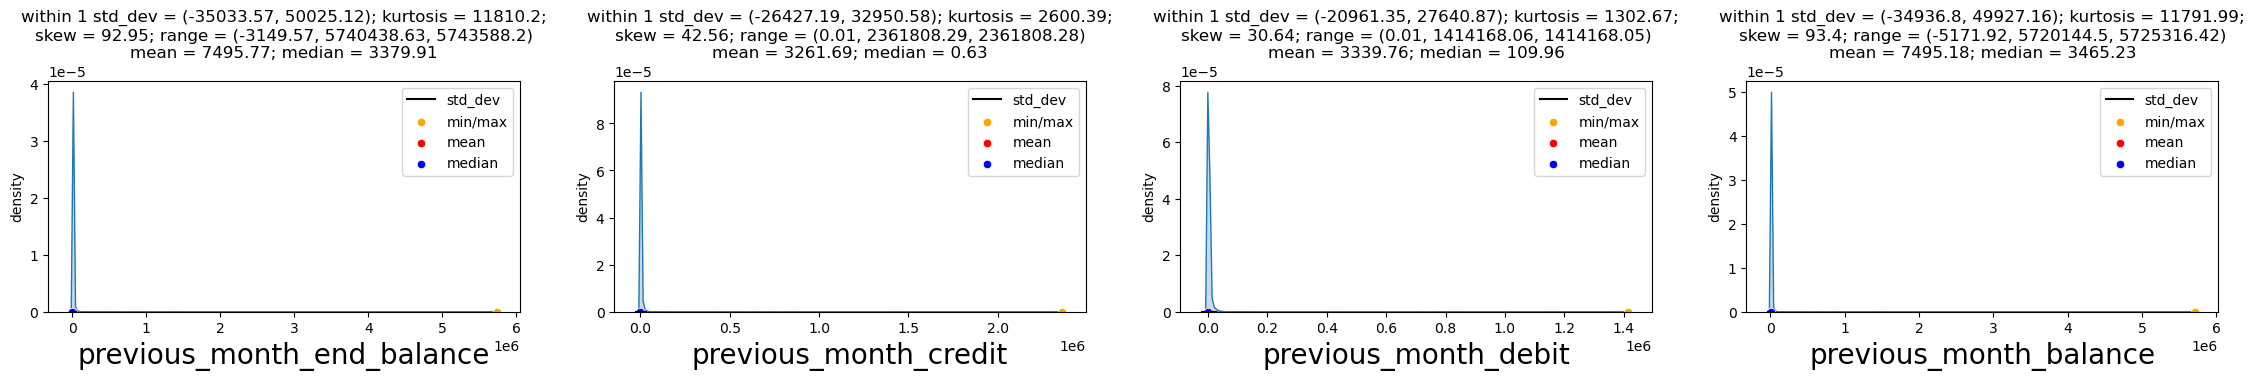

In [41]:
UVA_numeric(data,previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

### Previous Quarter

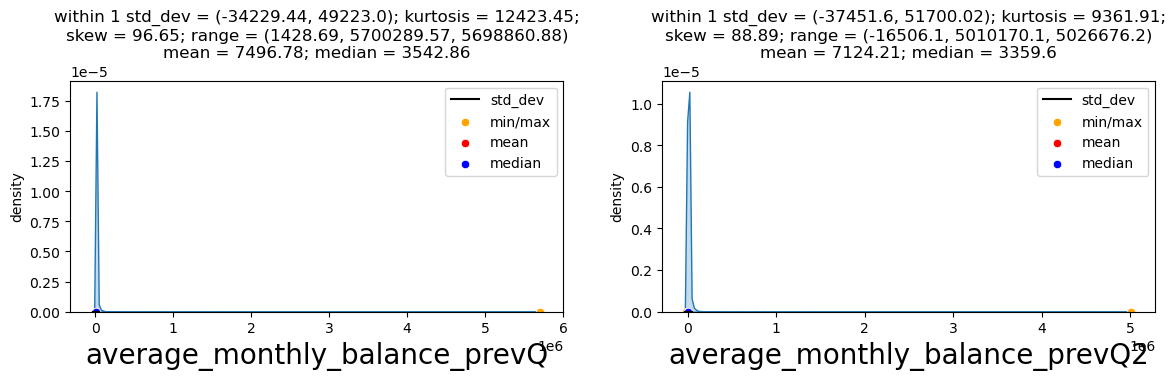

In [42]:
UVA_numeric(data,previous_quarters)

**Summary**

The general trend still follows, it is crucial that we find out if there is any common trait between the customers doing high amount of transactions.

### Transaction Date

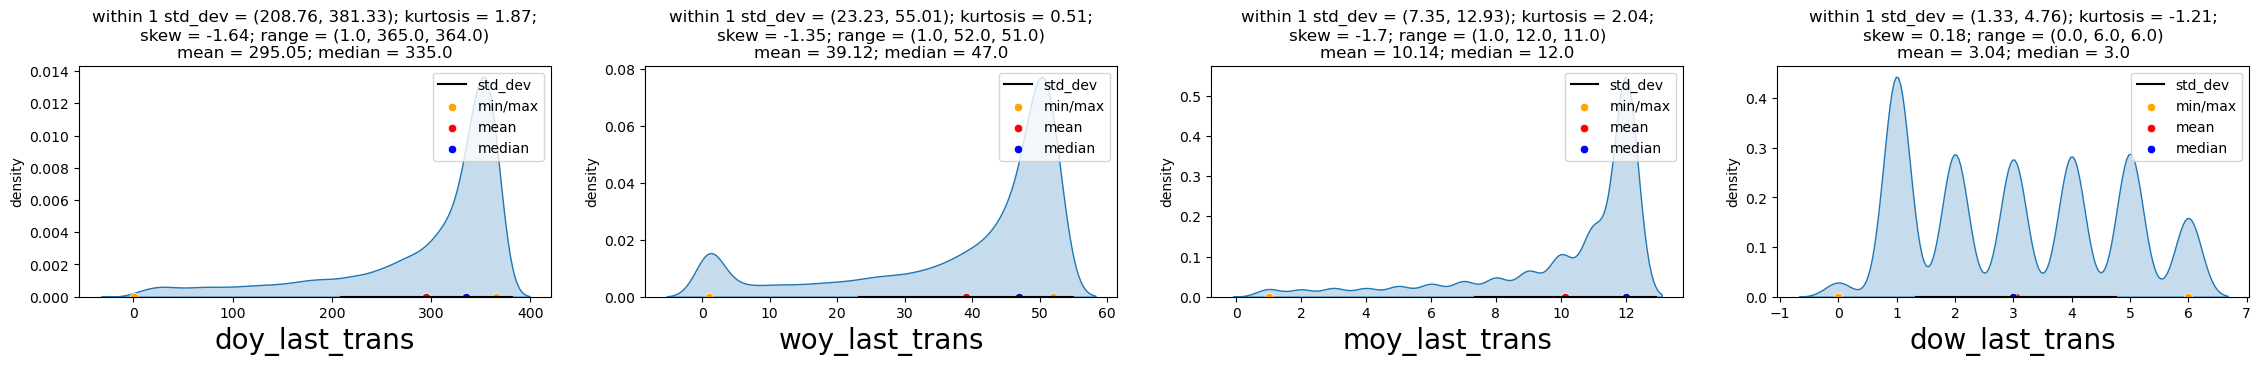

In [43]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:\
    *    most of the last transactions were made in the last 60 days of the extraction of data. \
    *    There are transactions which were made more than an year ago.
    

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.

**Things to investigate further Down**
*    **Customers whose last transaction was 6 months ago, did all of them churn?**

### Discrete distributions

In [44]:
data['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

In [45]:
data['gender'].value_counts(normalize=True)

Male      0.594034
Female    0.405966
Name: gender, dtype: float64

Approximately 60% customers are male and 40% female.

In [46]:
data['occupation'].nunique()

5

In [47]:
data['occupation'].mode()

0    self_employed
Name: occupation, dtype: category
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

### Distribution of gender of Churn customers

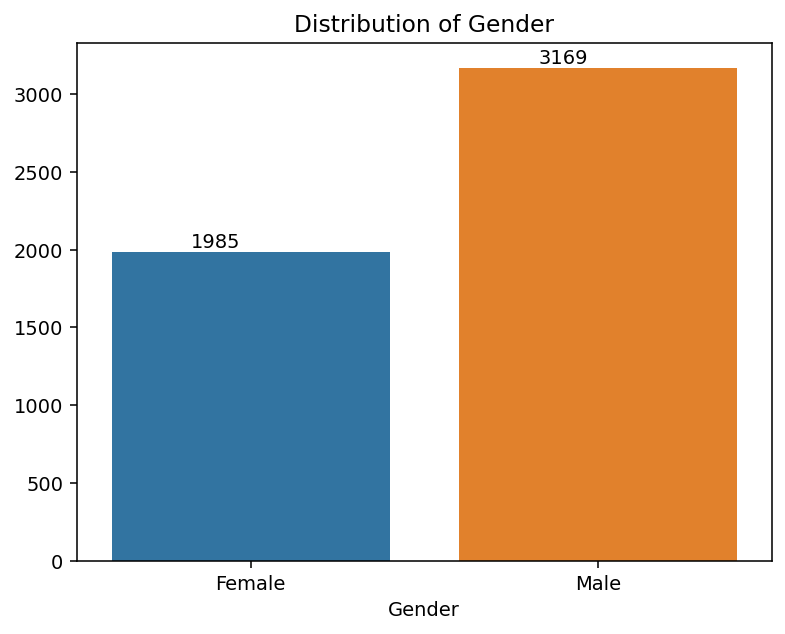

In [48]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y=data[data['churn']==1]['gender'].value_counts().values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
for p in ax.patches:
        ax.annotate('{:1.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

There are more male customers that are churning than female customers.

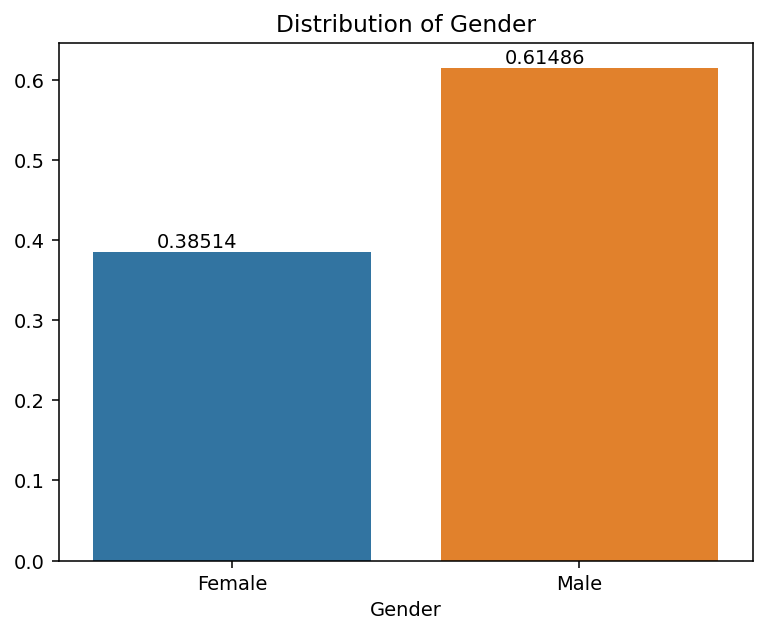

In [49]:
#Distribution in percentage
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['gender'].value_counts().index, y = data[data['churn']==1]['gender'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Gender')
plt.xlabel('Gender')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

* Around 61% of Churning Customers are Male Customers in our Dataset
* Around 39% of Churning Customers are female Customers in our Dataset
* __We saw similar distribution among the overall male-female customer ratio as well.__

### Distribution of occupation of churn customers

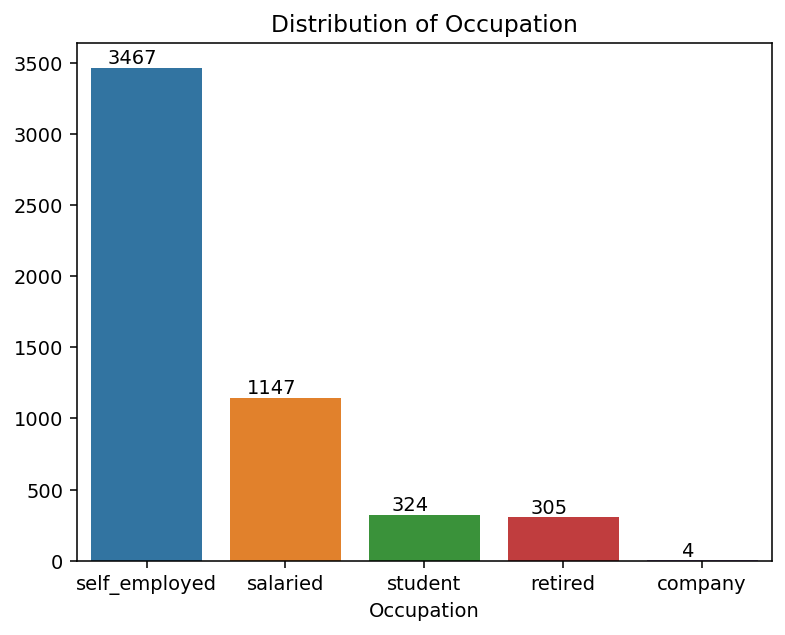

In [50]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, 
                 y = data[data['churn']==1]['occupation'].value_counts().values, 
                 orient = 'v', 
                 order= data[data['churn']==1]['occupation'].value_counts().index)
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

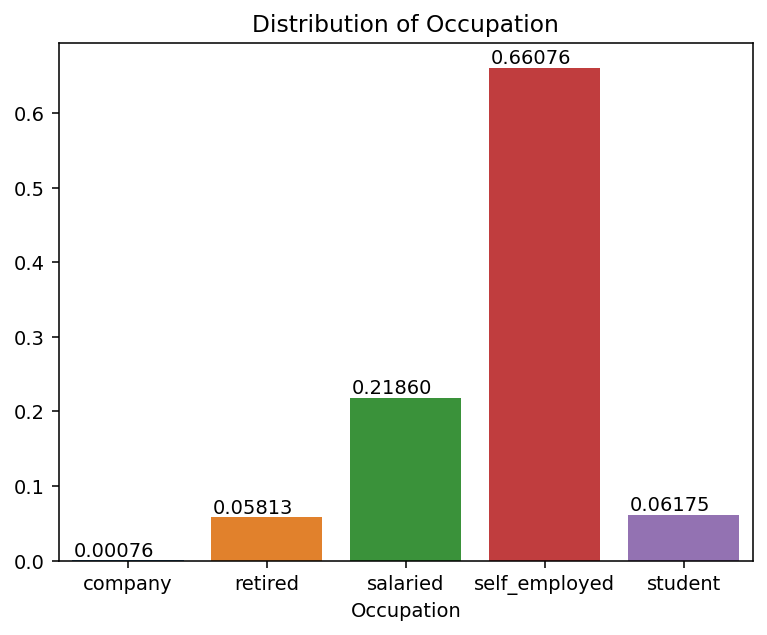

In [51]:
plt.figure(dpi = 140)
ax = sns.barplot(x=data[data['churn']==1]['occupation'].value_counts().index, y = data[data['churn']==1]['occupation'].value_counts(normalize=True).values, orient = 'v')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')

for p in ax.patches:
        ax.annotate('{:1.5f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()),
                    ha='center', va='bottom',
                    color= 'black')
        
plt.show()

In [52]:
def UVA_category(data, var_group, max_categories=10):

    '''
    Univariate_Analysis_categorical
    takes a group of variables (category) and plot/print the value_counts and barplot for max_categories.
    '''
    # setting figure_size
    size = len(var_group)
    plt.figure(figsize = (7*size,5), dpi = 100)

    # for every variable
    for j,i in enumerate(var_group):
        norm_count = data[i].value_counts(normalize = True)[:max_categories]
        n_uni = data[i].nunique()

        #Plotting the variable with every information
        plt.subplot(1,size,j+1)
        sns.barplot(x=norm_count, y=norm_count.index , order = norm_count.index)
        plt.xlabel('fraction/percent', fontsize = 20)
        plt.ylabel('{}'.format(i), fontsize = 20)
        plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

## Univariate Categorical variable analysis

#### Customer info

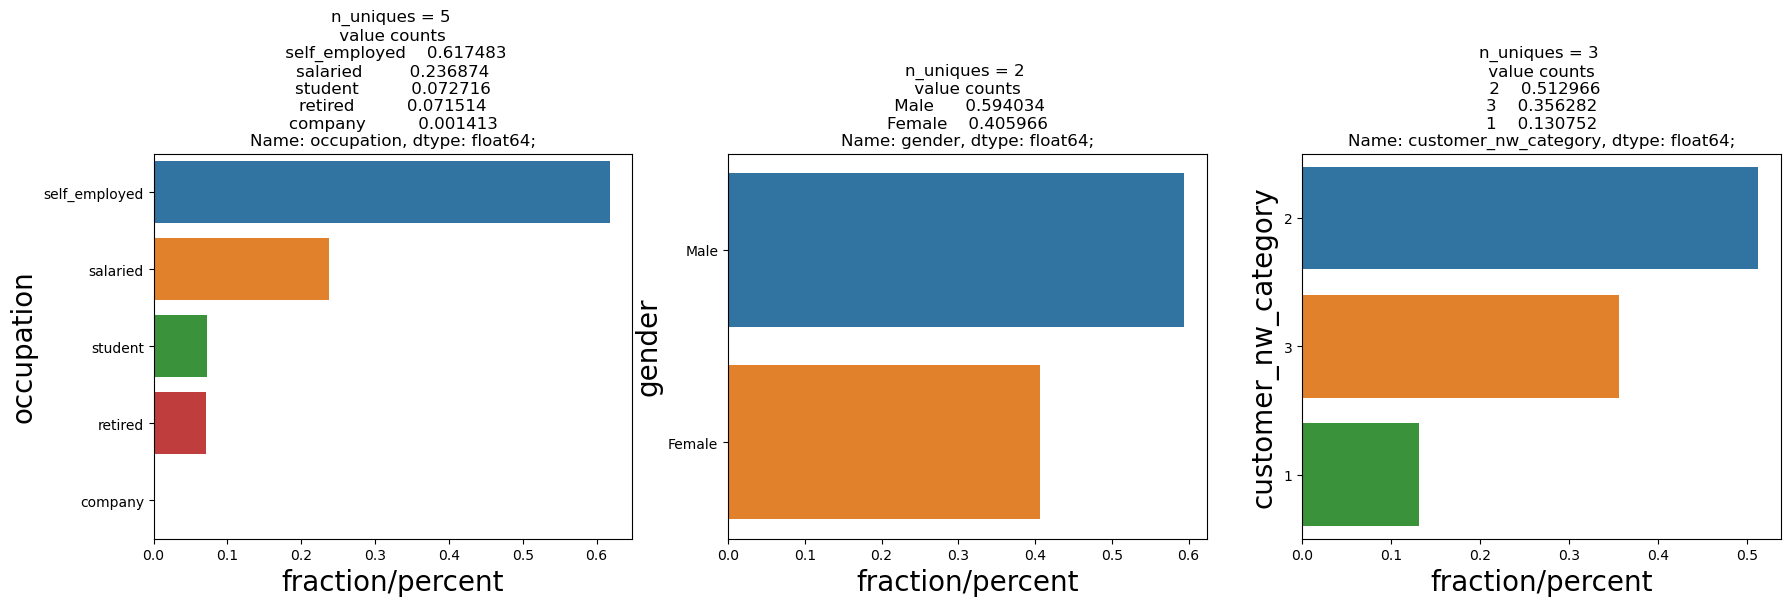

In [53]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary**
* Occupation
  * Majority of people are self_employed.
  * There are extremely few Company Accounts. Might explain Outlier/Extreme values in credit/debit.

* Gender:
  *  Males accounts are 1.5 times in number than Female Accounts.

* customer_nw_category:
  *  Half of all the accounts belong to the 3rd net worth category.
  *  Less than 15% belong to the highest net worth category.

**Things to investigate further down:**
* Possibility: Company accounts are the reason behind the outlier transactions.
* Possibility: customers belonging to the highest net worth category may explain the skewness of the transactions.

### Univariate: Missing Values

In [54]:
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_last_trans                    3223
woy_last_trans                    3223
moy_last_trans                    3223
dow_last_trans                    3223
dtype: int64

**Things to investigate further down:**
*    __Gender__:
      * churn: do missing values have any relation with churn?

* __Dependents__:
     * Missing values might be similar to zero dependents
     * churn: do missing values have any relation with churn?

* __Occupation__:
     * Do missing values have similar behaviour to any other occupation
     * do they have some relation with churn?

* __city__:
  * the respective cities can be foind using branch_code

* __last_transaction__:
  * checking their previous month and current month and previous_quarter activity might give insight on their last transaction.

### Outlier Analysis 

In [55]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data=data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 1st,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


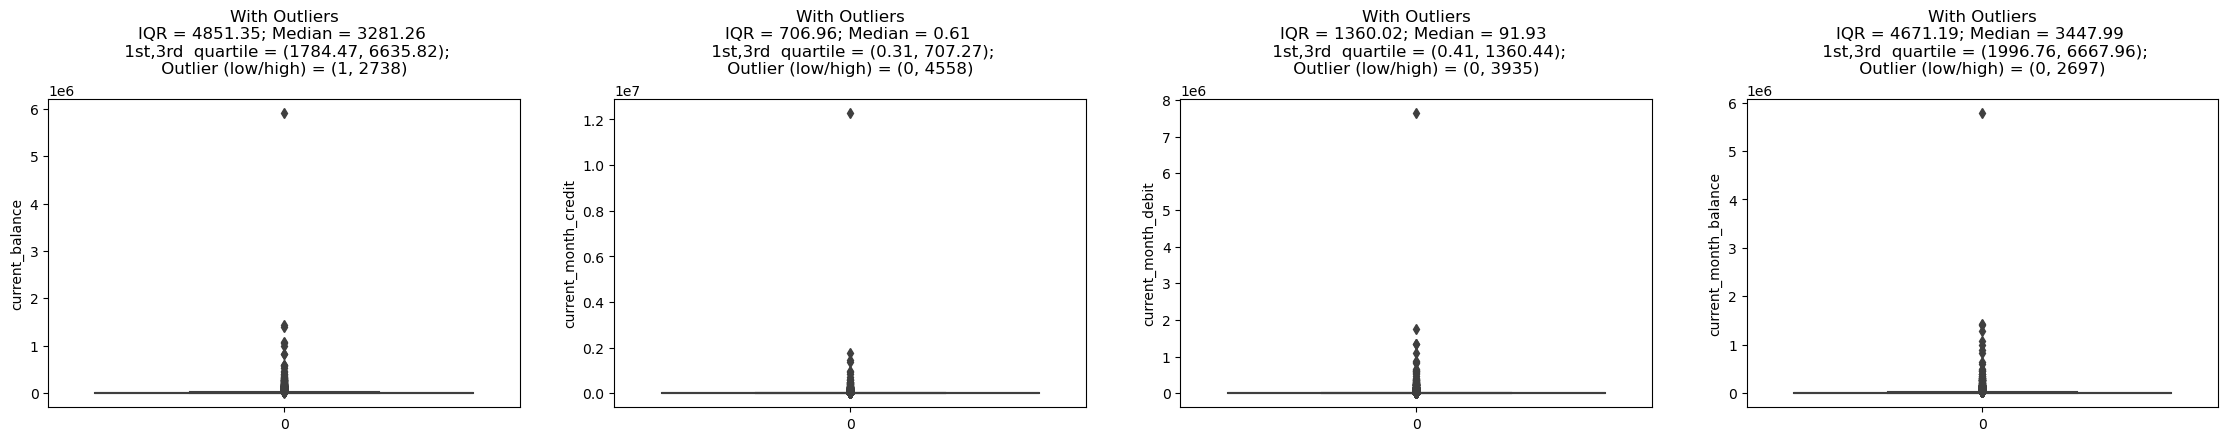

In [56]:
UVA_outlier(data, current_month,)

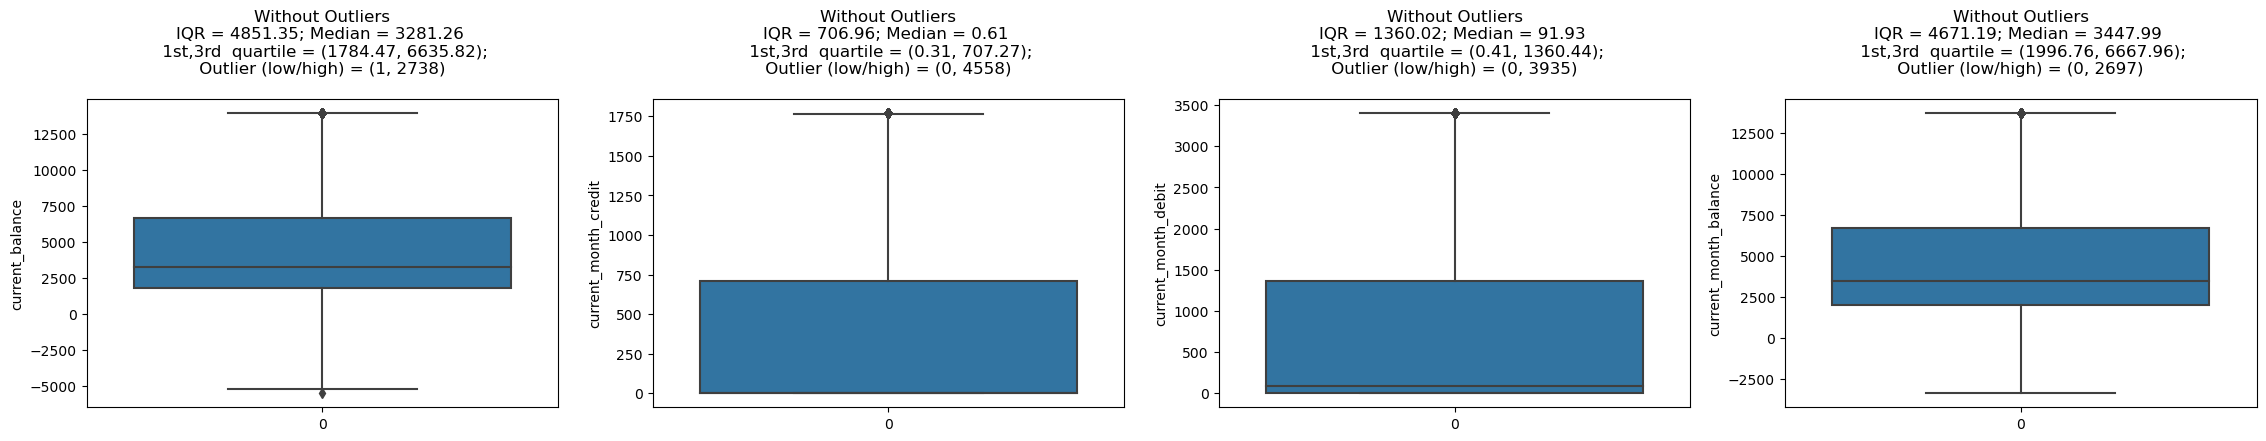

In [57]:
UVA_outlier(data, current_month,include_outlier=False)

True
True
True
True


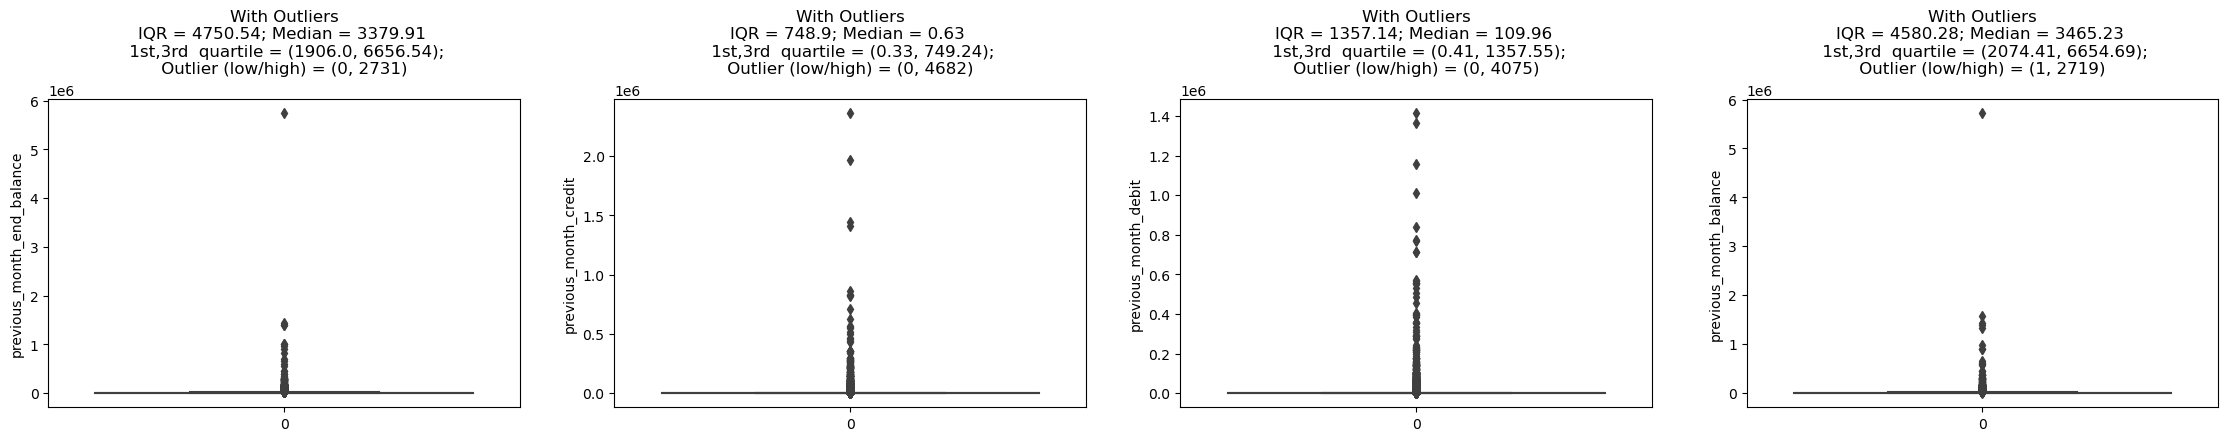

In [58]:
UVA_outlier(data, previous_month)

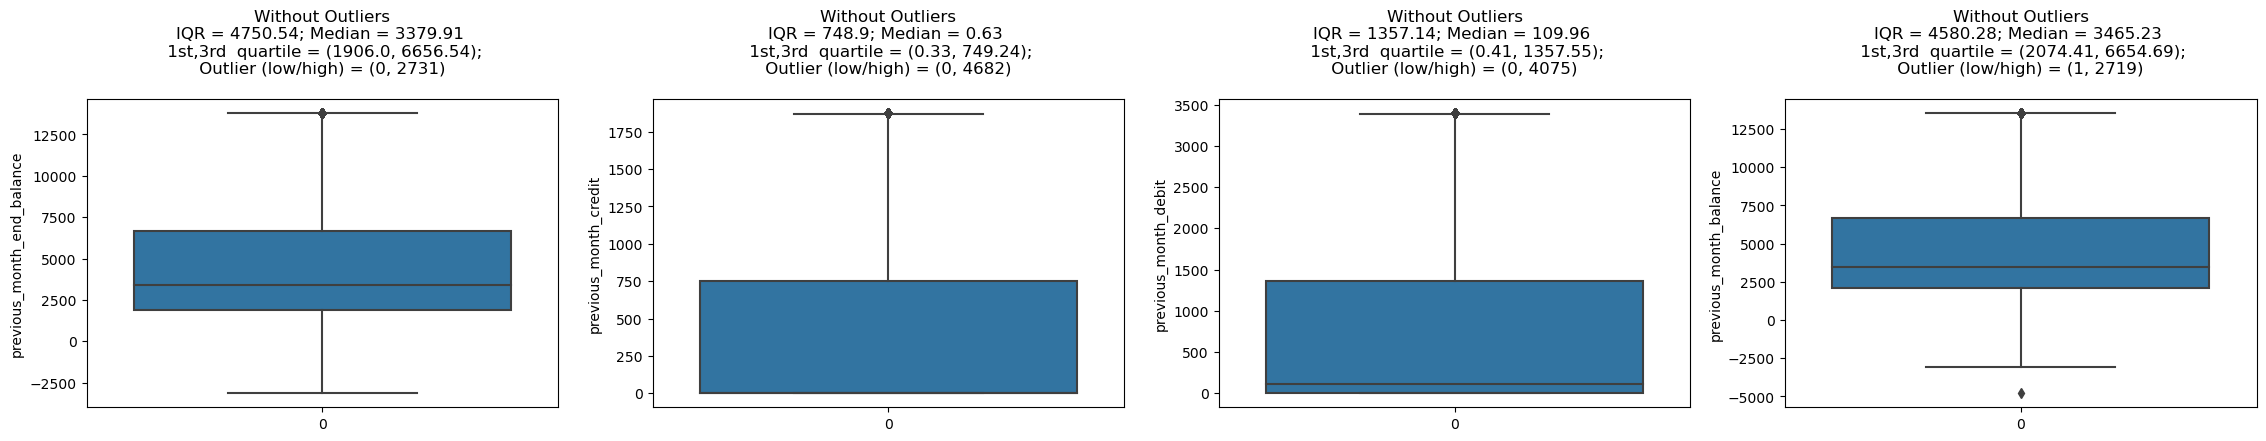

In [59]:
UVA_outlier(data, previous_month, include_outlier=False)

**Summary:**
* If we look at corresponding plots in the outputs above, there seems to be a strong relation between the corresponding plots of previous_month and current_month variables.

* Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of Outliers.

## Investigation directions from Univariate Analysis
1. customer_id variable can be dropped.
2.  Is there there any common trait/relation between the customers who are performing high transaction credit/debits?
   * customer_nw_category might explain that.
   * Occupation = Company might explain them
   * popular cities might explain this
4.  Customers whose last transaction was 6 months ago, did all of them churn? 
5. Possibility that cities and branch code with very few accounts may lead to churning.


## Bi-Variate Analysis: Numerical- Numerical

In [60]:
numerical= data.select_dtypes(include= ['int64','float64', 'Int64'])[:]
numerical.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_last_trans                    float64
woy_last_trans                    float64
moy_last_trans                    float64
dow_last_trans                    float64
dtype: object

In [61]:
# calculating correlation
correlation = numerical.dropna().corr()
correlation

customer_id   vintage       age  dependents  \
customer_id                        1.000000 -0.011288  0.001397   -0.009737   
vintage                           -0.011288  1.000000  0.003170    0.005109   
age                                0.001397  0.003170  1.000000   -0.003809   
dependents                        -0.009737  0.005109 -0.003809    1.000000   
current_balance                    0.014989 -0.007223  0.058925   -0.004554   
previous_month_end_balance         0.012414 -0.008001  0.062775   -0.000826   
average_monthly_balance_prevQ      0.011372 -0.010858  0.070903    0.000121   
average_monthly_balance_prevQ2     0.008060 -0.003824  0.081361    0.002584   
current_month_credit               0.004223 -0.004821  0.023921    0.002188   
previous_month_credit             -0.004819 -0.000410  0.027678    0.022772   
current_month_debit                0.004870 -0.004899  0.025366    0.006784   
previous_month_debit              -0.005906 -0.007777  0.027717    0.029073   
current_month_balance              0.012085 -0.008703  0.063120   -0.001859   
previous_month_balance             0.011025 -0.010439  0.067712    0.000241   
doy_last_trans                    -0.006114 -0.000680  0.010754    0.079740   
woy_last_trans                     0.011344 -0.010040  0.000501    0.034460   
moy_last_trans                    -0.005374 -0.001359  0.011970    0.077978   
dow_last_trans                     0.009665 -0.009683 -0.020895   -0.001702   

                                current_balance  previous_month_end_balance  \
customer_id                            0.014989                    0.012414   
vintage                               -0.007223                   -0.008001   
age                                    0.058925                    0.062775   
dependents                            -0.004554                   -0.000826   
current_balance                        1.000000                    0.809257   
previous_month_end_balance             0.809257                    1.000000   
average_monthly_balance_prevQ          0.857204                    0.908053   
average_monthly_balance_prevQ2         0.584156                    0.661439   
current_month_credit                   0.053329                    0.051080   
previous_month_credit                  0.101495                    0.195149   
current_month_debit                    0.075149                    0.100379   
previous_month_debit                   0.151771                    0.192376   
current_month_balance                  0.940234                    0.910206   
previous_month_balance                 0.812295                    0.912269   
doy_last_trans                         0.035242                    0.024130   
woy_last_trans                        -0.008980                    0.000946   
moy_last_trans                         0.033127                    0.023485   
dow_last_trans                        -0.000315                    0.002033   

                                average_monthly_balance_prevQ  \
customer_id                                          0.011372   
vintage                                             -0.010858   
age                                                  0.070903   
dependents                                           0.000121   
current_balance                                      0.857204   
previous_month_end_balance                           0.908053   
average_monthly_balance_prevQ                        1.000000   
average_monthly_balance_prevQ2                       0.731953   
current_month_credit                                 0.051294   
previous_month_credit                                0.138967   
current_month_debit                                  0.091491   
previous_month_debit                                 0.187226   
current_month_balance                                0.920943   
previous_month_balance                               0.983797   
doy_last_trans                                       

In [62]:
#to make it readable

c= numerical.corr().abs()

s= c.unstack()
so= s.sort_values(kind='quicksort', ascending= False)
so= pd.DataFrame(so, columns= ['Pearson Correlation'])

so[so['Pearson Correlation']<1].head(20)

Pearson Correlation
doy_last_trans                moy_last_trans                            0.994550
moy_last_trans                doy_last_trans                            0.994550
average_monthly_balance_prevQ previous_month_balance                    0.994038
previous_month_balance        average_monthly_balance_prevQ             0.994038
current_balance               current_month_balance                     0.983412
current_month_balance         current_balance                           0.983412
                              average_monthly_balance_prevQ             0.976290
average_monthly_balance_prevQ current_month_balance                     0.976290
previous_month_end_balance    current_month_balance                     0.974714
current_month_balance         previous_month_end_balance                0.974714
previous_month_end_balance    average_monthly_balance_prevQ             0.970530
average_monthly_balance_prevQ previous_month_end_balance                0.970530
previous_month_balance        previous_month_end_balance                0.969605
previous_month_end_balance    previous_month_balance                    0.969605
current_month_balance         previous_month_balance                    0.963276
previous_month_balance        current_month_balance                     0.963276
current_balance               average_monthly_balance_prevQ             0.958307
average_monthly_balance_prevQ current_balance                           0.958307
current_balance               previous_month_end_balance                0.947276
previous_month_end_balance    current_balance                           0.947276

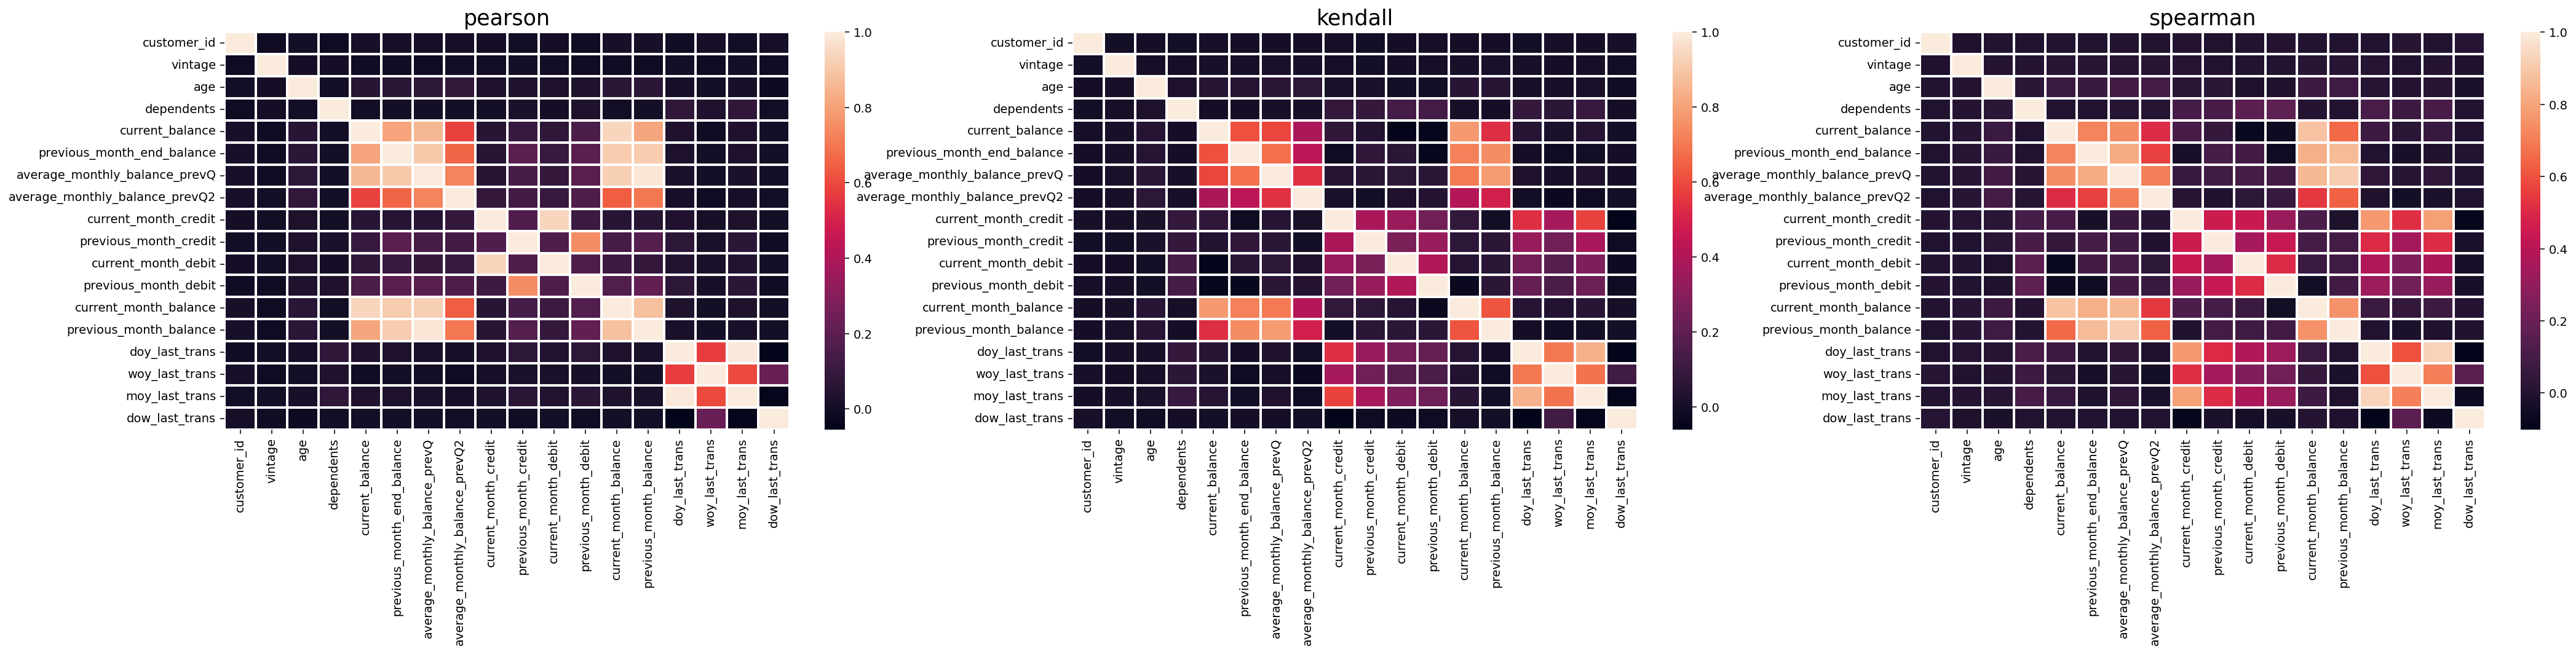

In [63]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

* Kendall and Spearman correlation seem to have very similar pattern between them, except the slight variation in magnitude of correlation.
*  Too many variables with insignificant correlation.
*  Major correlation lies between the transaction variables and balance variables.

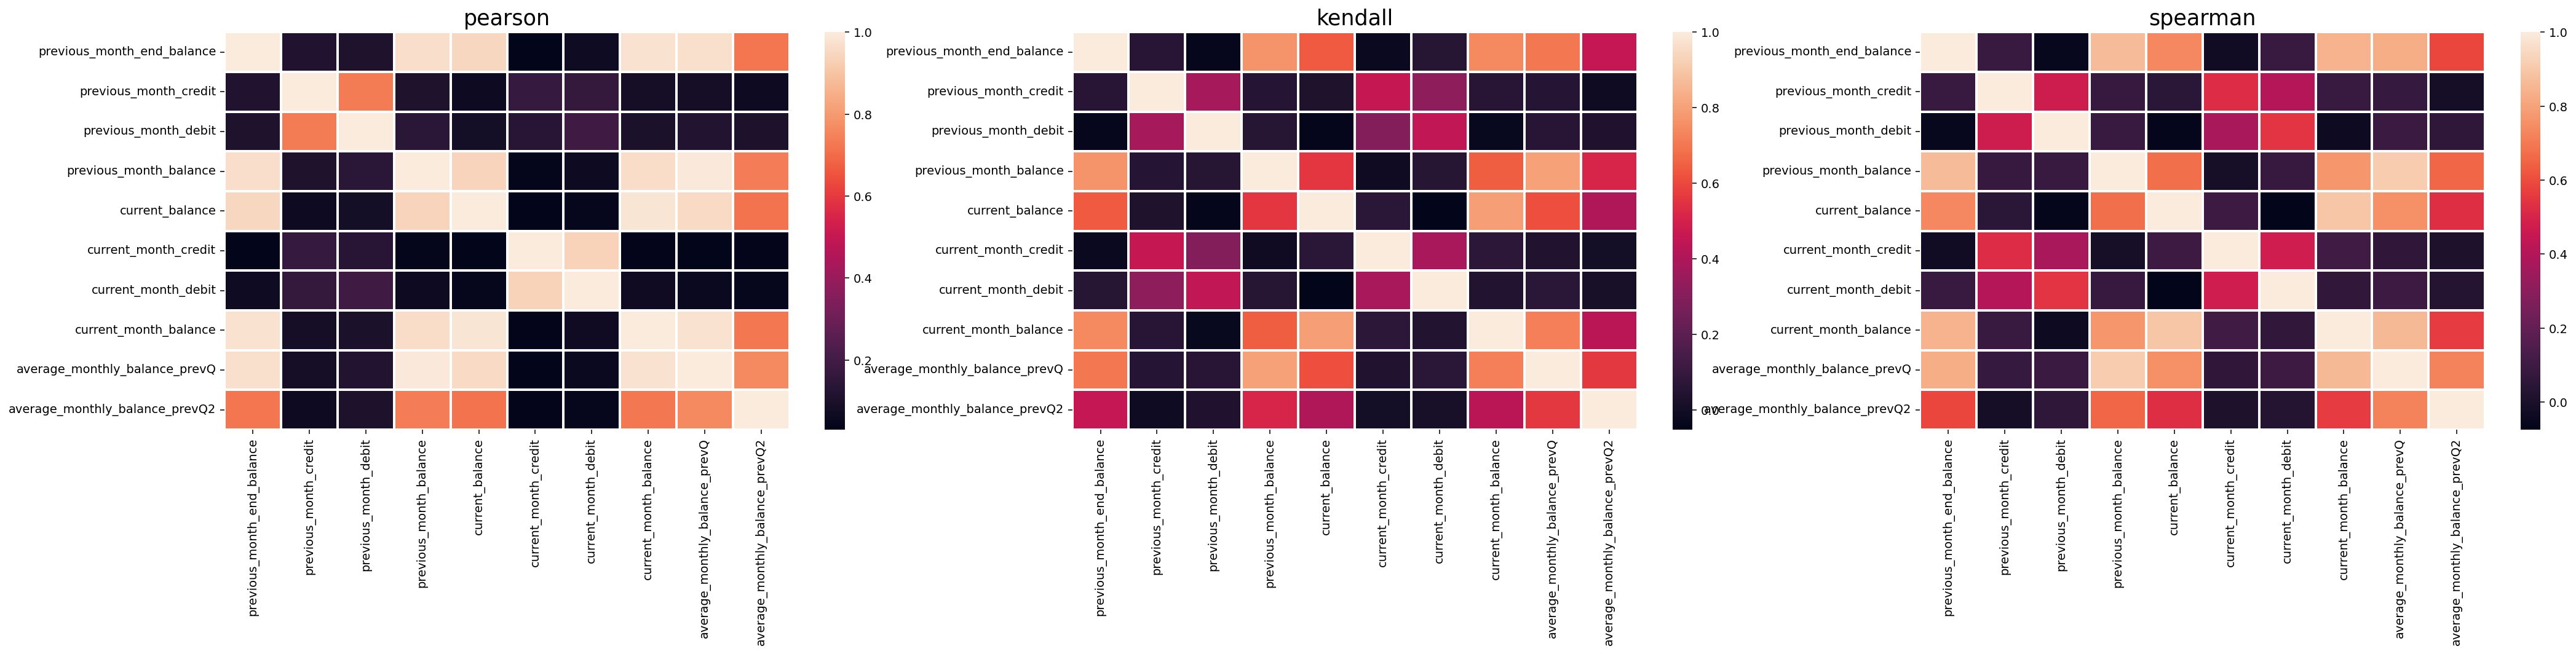

In [64]:
# extracting transaction information of current and previous months
var = []
var.extend(previous_month)
var.extend(current_month)
var.extend(previous_quarters)

# plotting heatmap usill all methods for all transaction variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = numerical[var].dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

**Inferences:**


1.   Transaction variables like credit/debit have a strong correlation among themselves.
2.  Balance variables have strong correlation among themselves.
3.   Transaction variables like credit/debit have insignificant or no correlation with the Balance variables.

### Scatterplot

In [65]:
# Grouping variables
transactions = ['current_month_credit','current_month_debit','previous_month_credit','previous_month_debit']
balance = ['previous_month_end_balance','previous_month_balance','current_balance','current_month_balance']


<Figure size 896x672 with 0 Axes>

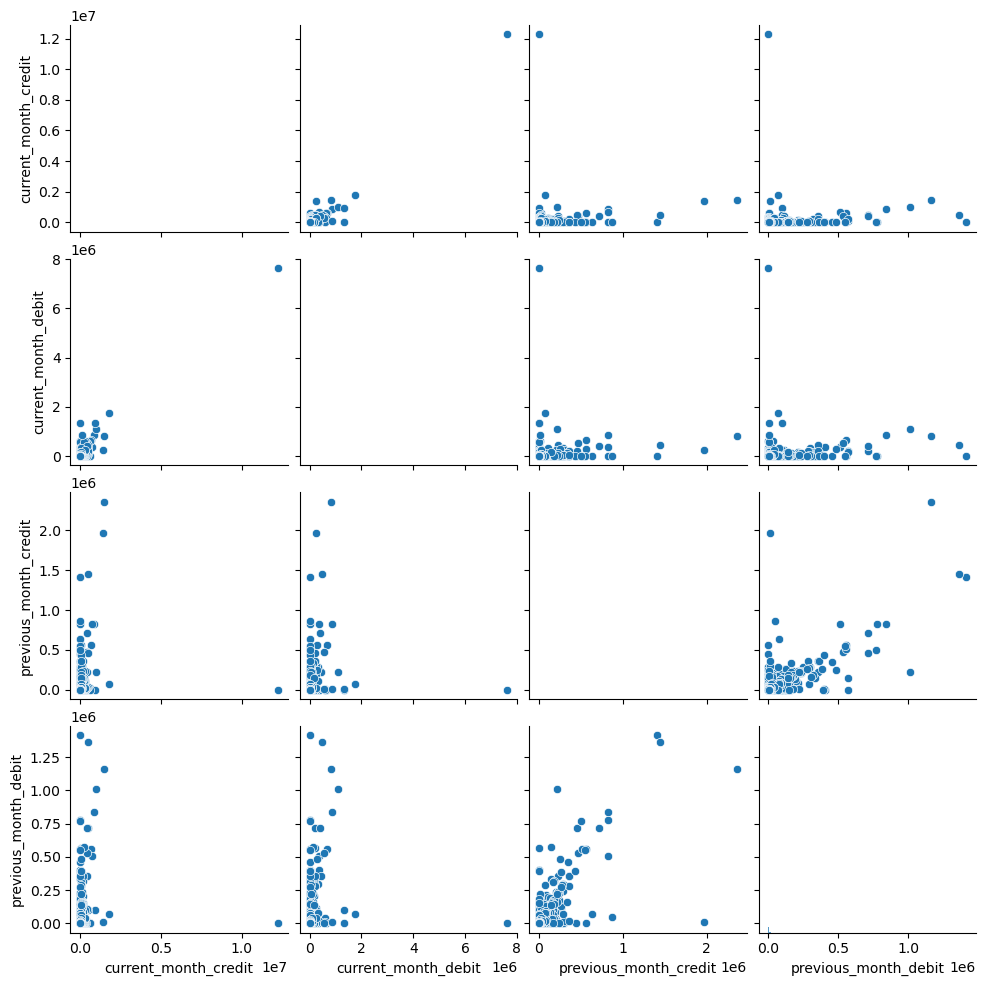

In [66]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

In [67]:
#taking log of every value to negate outliers
for column in var:
  mini=1
  if numerical[column].min()<0:
    mini =  abs(numerical[column].min()) + 1
  
  numerical[column] = [i+mini for i in numerical[column]]
  numerical[column] = numerical[column].map(lambda x : np.log(x))

<Figure size 896x672 with 0 Axes>

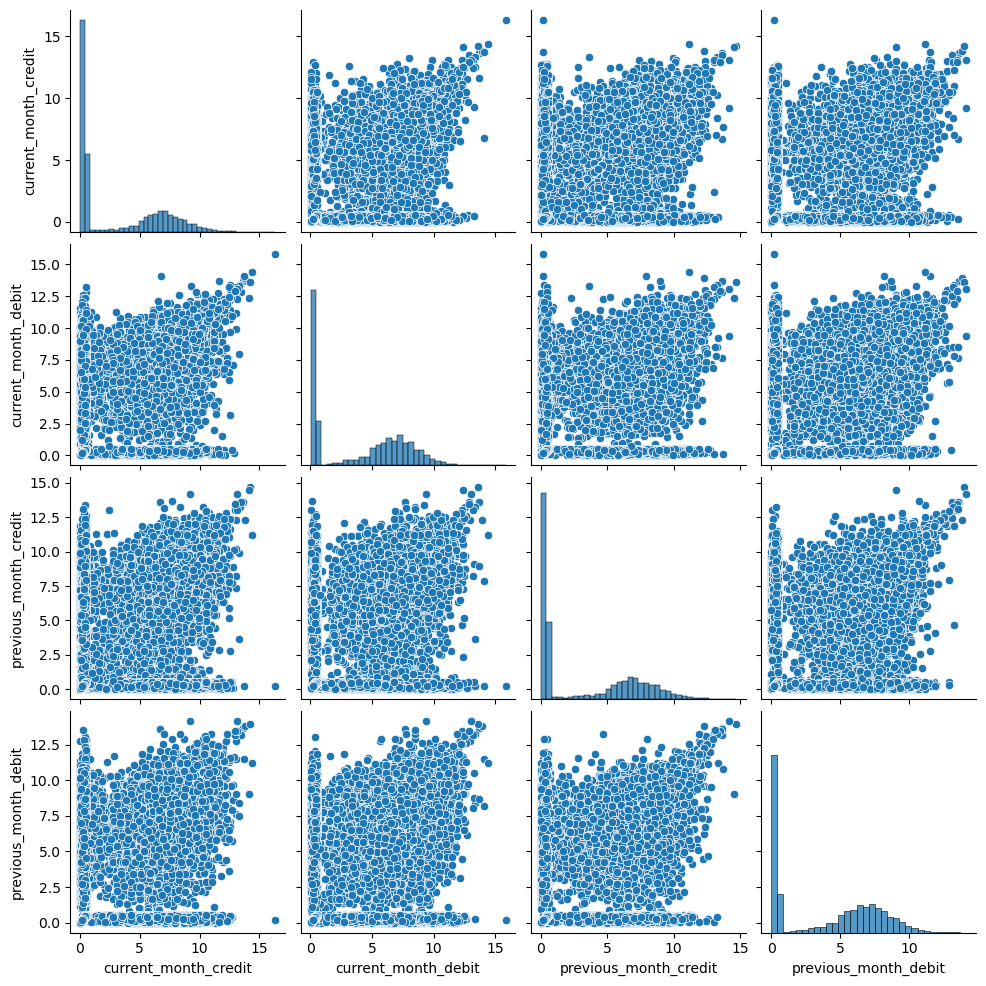

In [68]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(numerical[transactions])

**Inferences**
1.    This validates the high correlation between the transaction variables.
2.    This high correlation can be used for feature engineering during the later stages.

<Figure size 896x672 with 0 Axes>

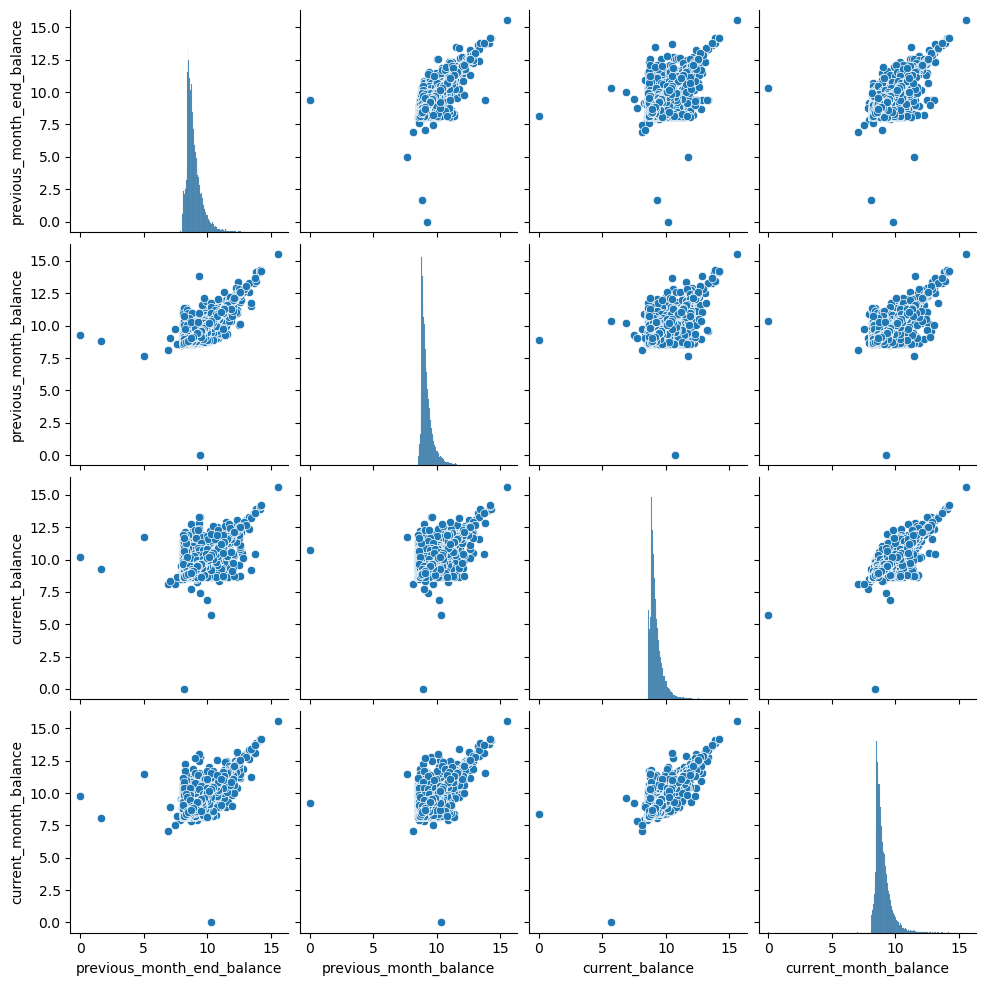

In [69]:
# balance variables
plt.figure(dpi=140)
sns.pairplot(numerical[balance])

**Inferences**
1.    This validates the high correlation between the balance variables.
2.    This high correlation can be used for feature engineering during the later stages.

## Bivariate analysis: Continuous- Categorical variables

List of Hypothesis and investigation to perform under this combination.

1.  Are vintage customers less likely to churn?
2.  Are customers with higher average balance less likely to churn?
3.  Are customers dropping monthly balance highly likely to churn?

Note: T-test assumes that the data follows continuous distribution. For simplicity, let's consider that it's normally distributed in our example.

In [71]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [70]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [75]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.std()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot(x= [str(category),'not {}'.format(category)], y=[m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

### Are vintage customers more likely to churn?

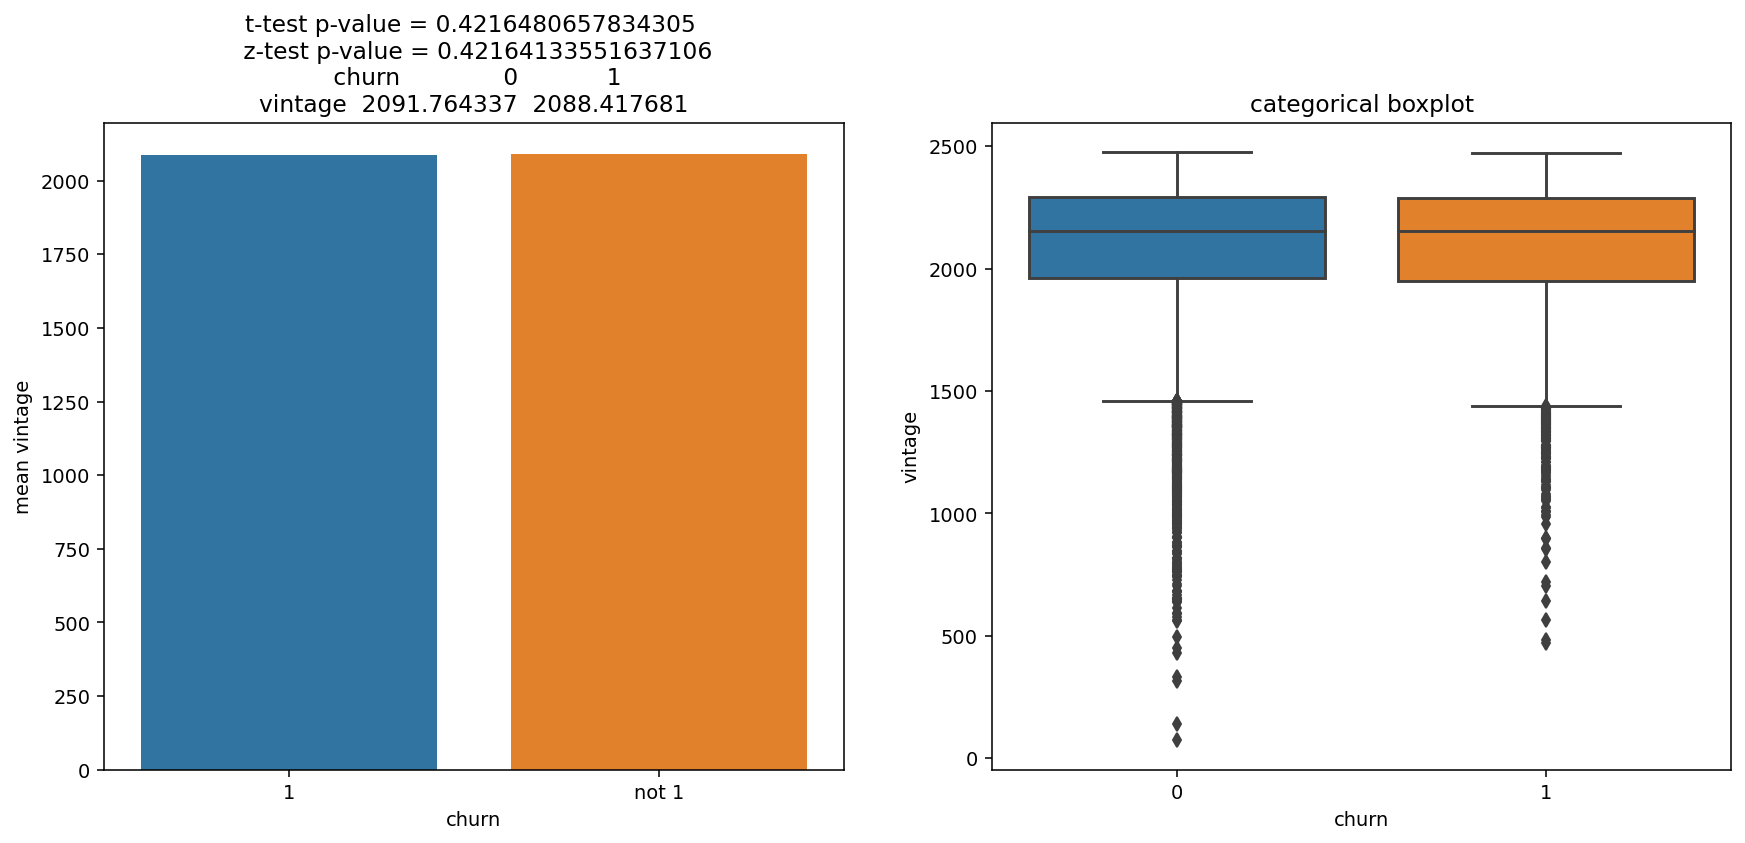

In [77]:
Bivariate_cont_cat(data, 'vintage', 'churn', 1)

**Inferences**

1.    Vintage customers churned more, but results are not significantly different
2.    Boxplot shows very similar distribution with outliers on the lower end.

**Result**

We can safely reject the hypothesis that vintage customers are more likely to churn.

### 2. Are customers with higher average balance less likely to churn?

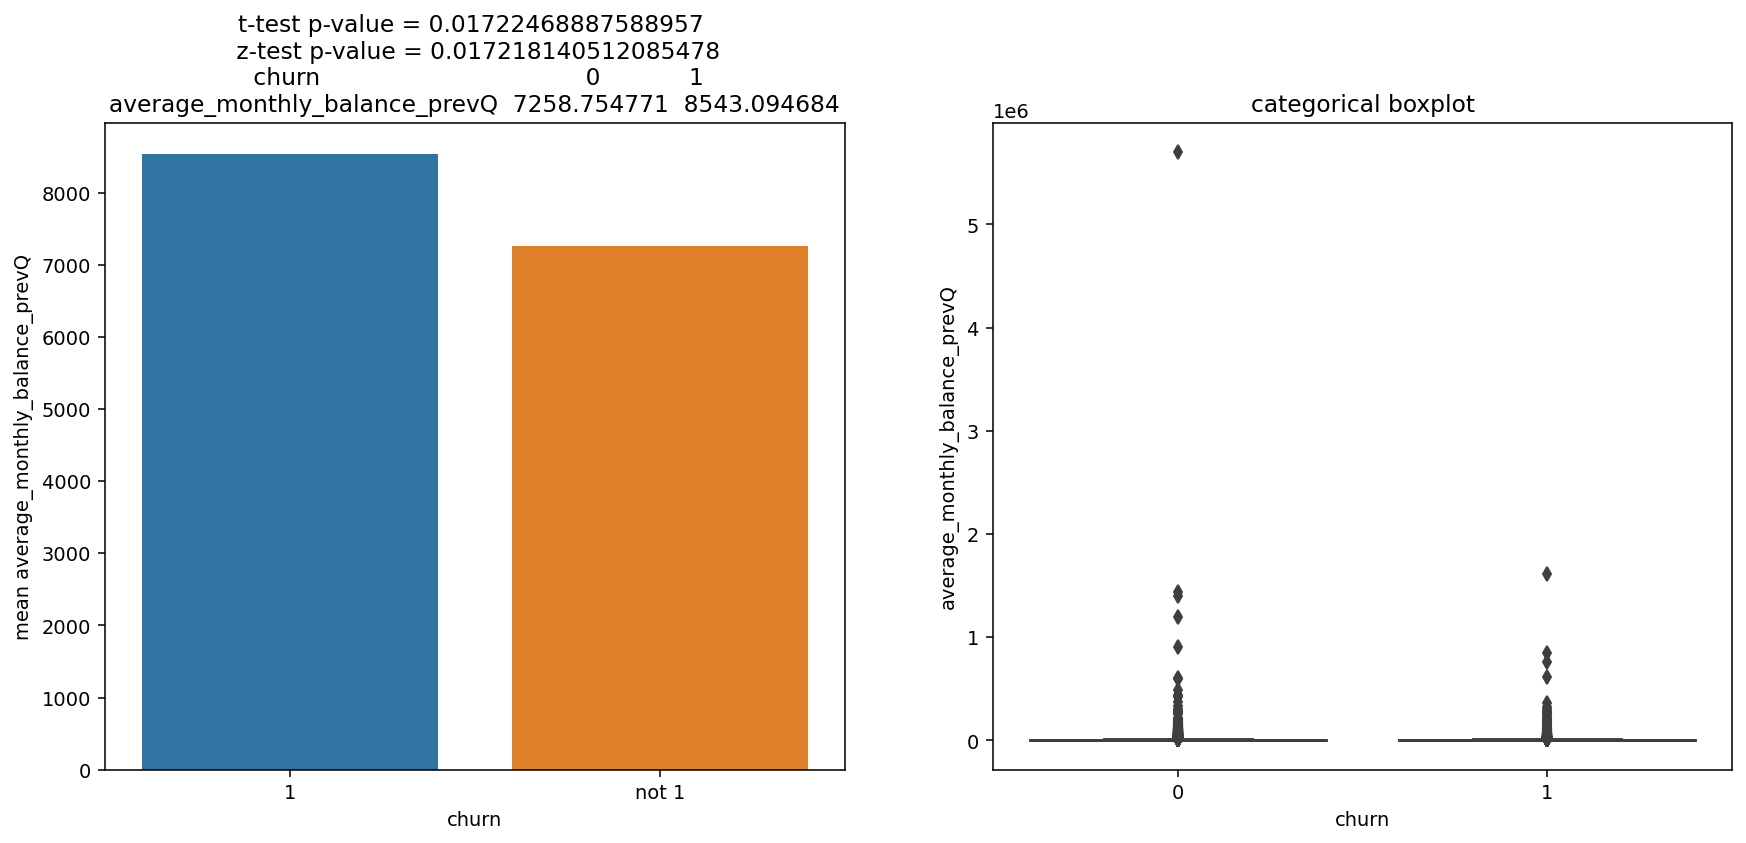

In [78]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ', 'churn', 1)

**Inferences**
*    Customers who churned have significantly higher balance during immediate preceeding quarter.

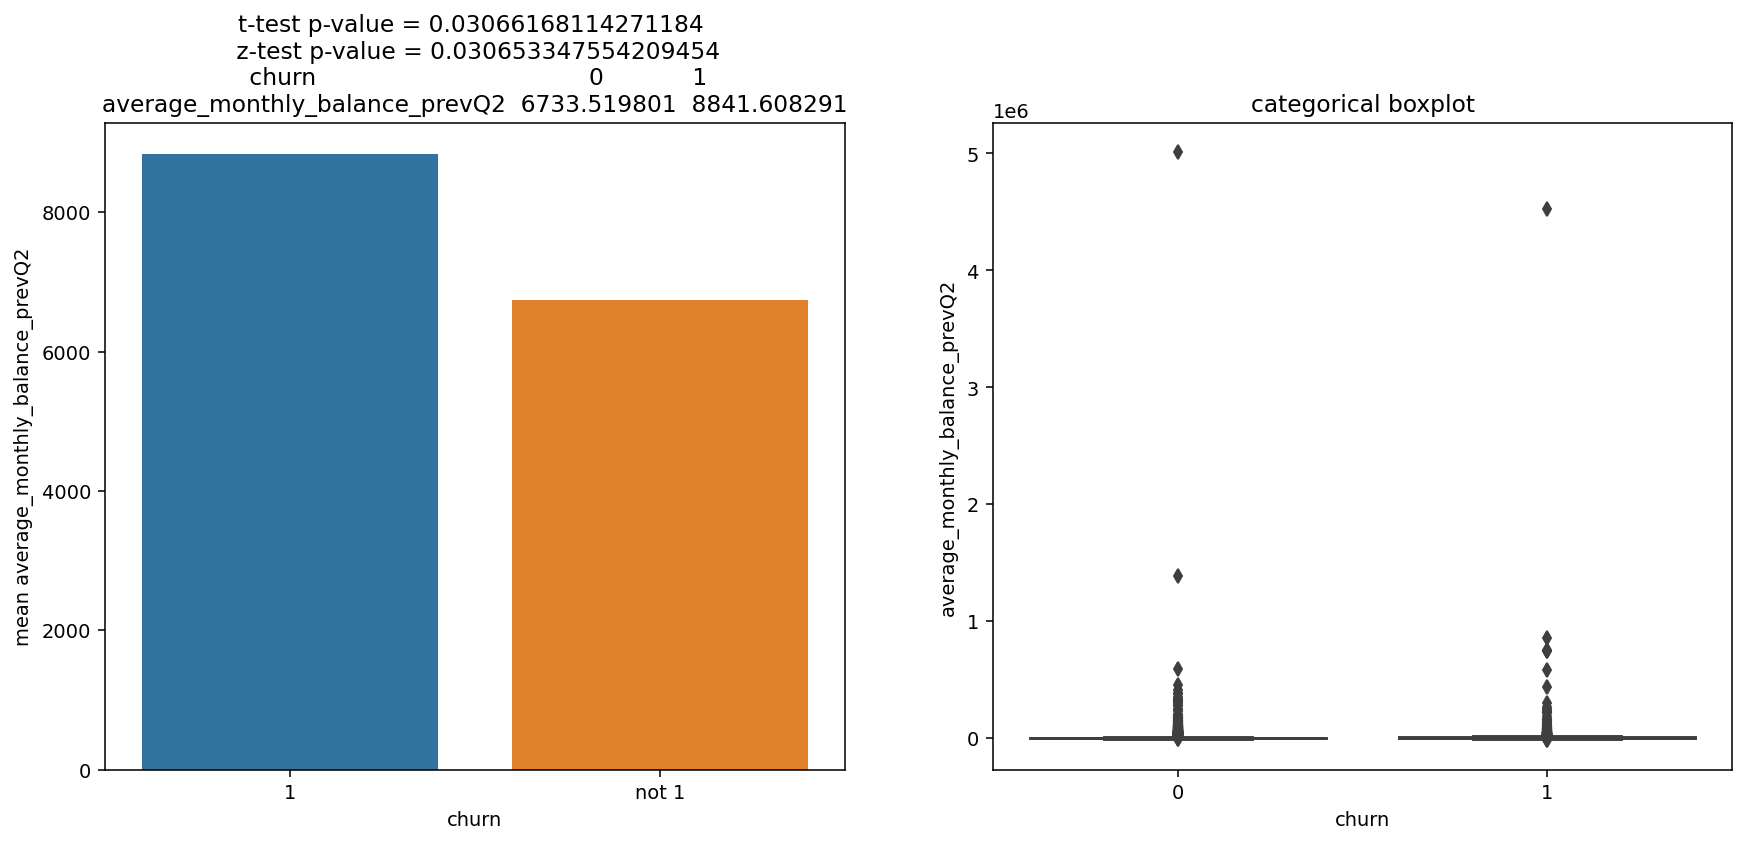

In [79]:
Bivariate_cont_cat(data, 'average_monthly_balance_prevQ2', 'churn', 1)

**Inferences**

We can see that people who churned actually had significantly higher balance during their previous two quarters.


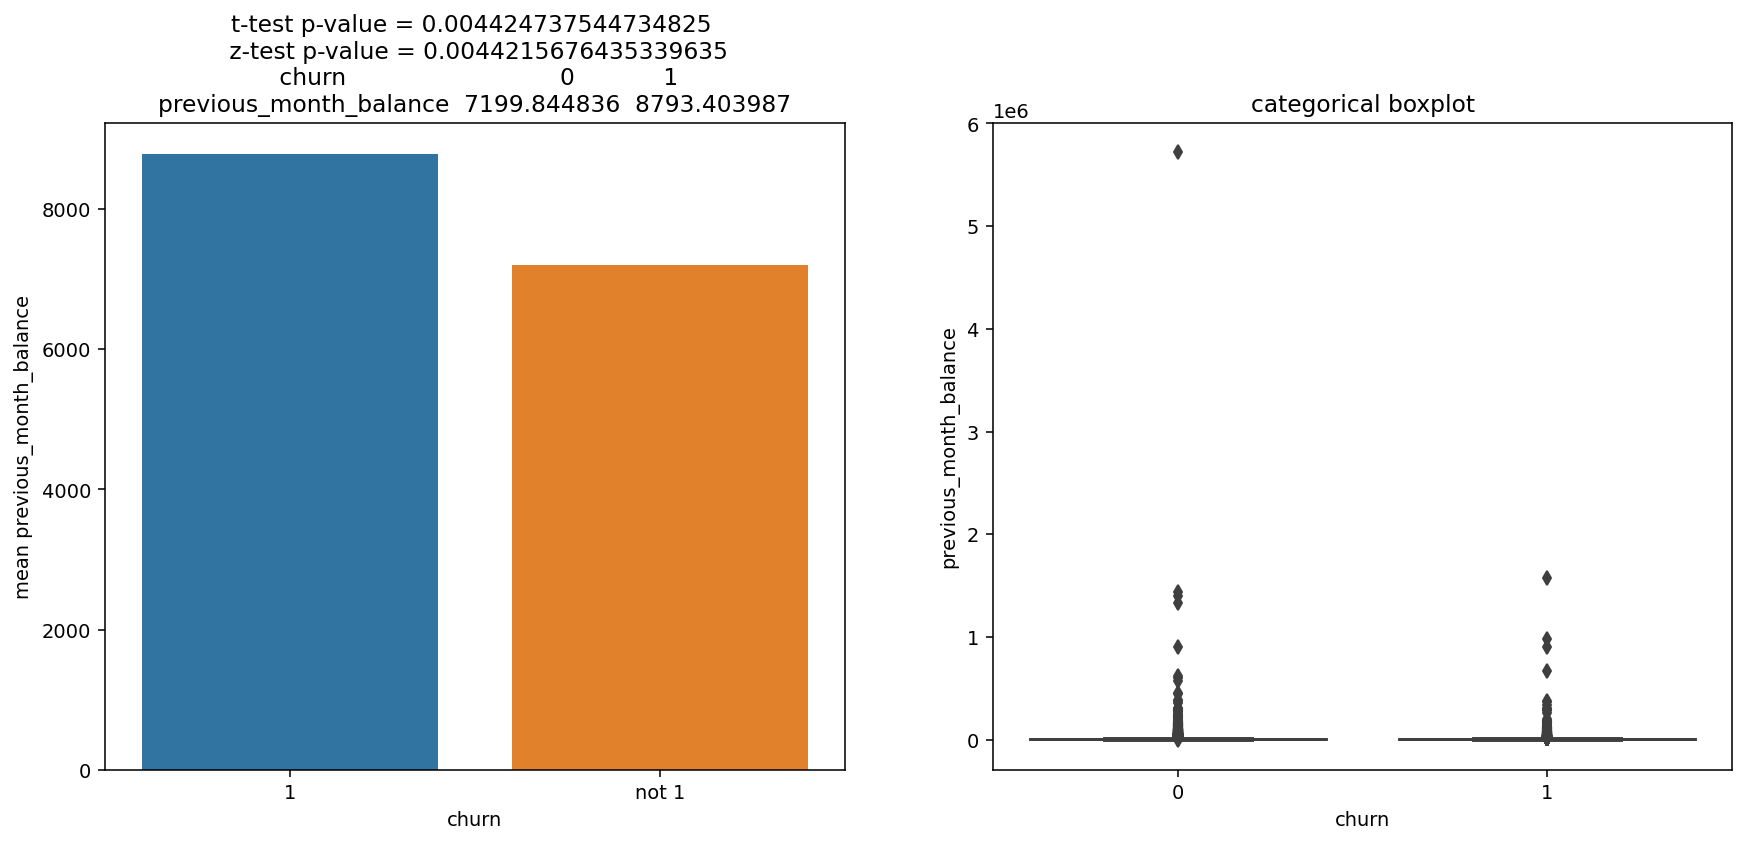

In [80]:
Bivariate_cont_cat(data, 'previous_month_balance', 'churn', 1)

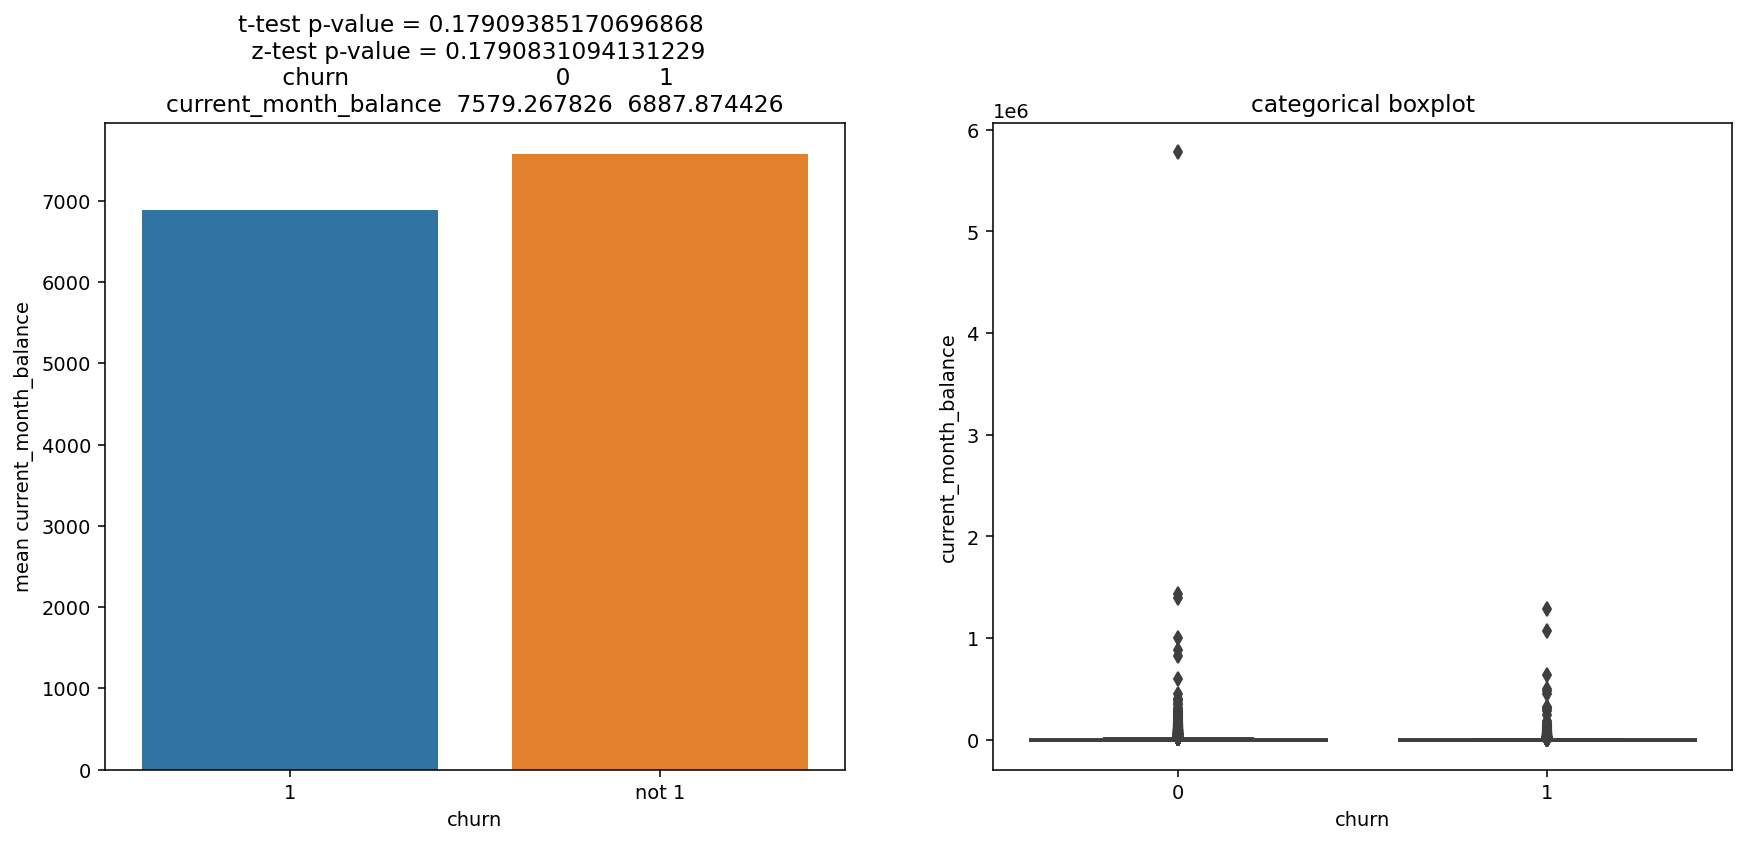

In [81]:
Bivariate_cont_cat(data, 'current_month_balance', 'churn', 1)

**Inferences**

Customers who churned had significantly high balance throughout the previous two quarters and previous month. But their average balance reduced significantly in the current month.

### 3. Are customers dropping monthly balance highly likely to churn?

In [82]:
# Extracting drop of balance in previous and current month
difference = data[['churn','previous_month_balance','current_month_balance']][:]
difference['bal_diff'] = difference['current_month_balance']-difference['previous_month_balance']

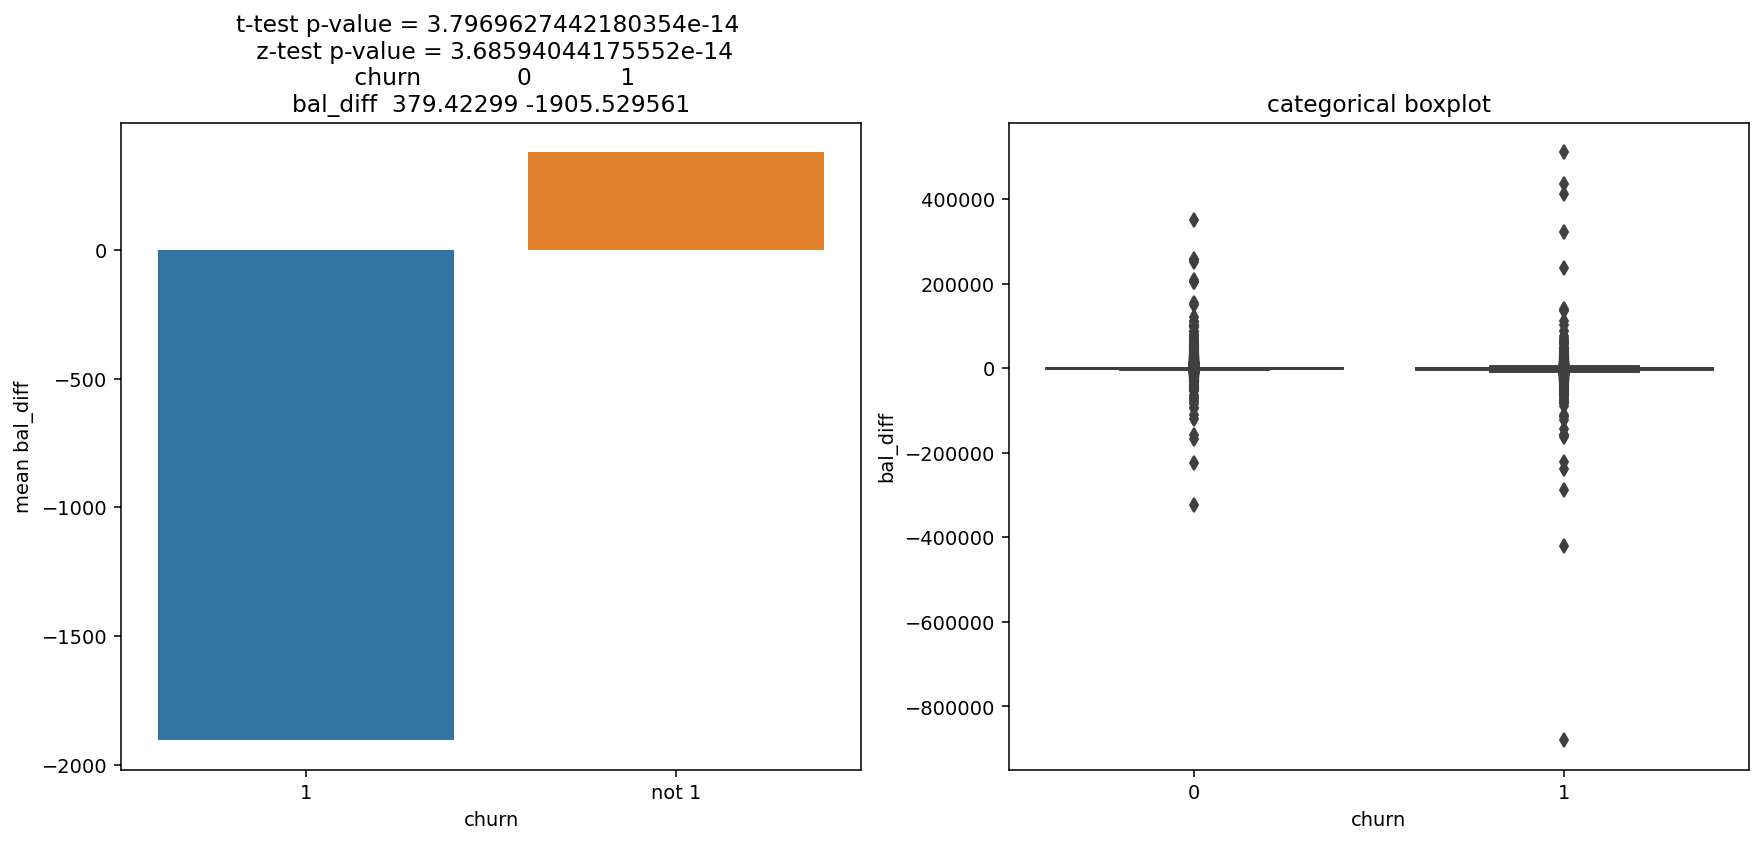

In [84]:
Bivariate_cont_cat(difference, 'bal_diff', 'churn', 1)

**Inference**

Customers who churned had a very high drop in their balance which is signified by the negative value in this bar plot.

__This is a very important result__

### Bivariate: Categorical-Categorical

#### List of Hypothesis to check under this combination
1.   Are females less likely to churn than males?
2.   Are young customers more likely to churn?
3.   Are customers in the lower income bracket more likely to churn?
4.   Are customers with dependent(s) less likely to churn?
5.   Customers with an average family size less than 4 are more likely to churn?
6.   Customers whose last transaction was more than 6 months ago, do they have higher churn rate?
7.   Possibility that cities and branch code with very few accounts may lead to churning.

**Missing Values** - finding behaviour

**Gender**: 
  *  Do missing values churn more?

**Dependents**:
  *  Do missing values have any relation with churn?

**Occupation:**
   * Do they have some relation with churn?

In [3]:
d = data[['churn', 'gender']]
t = pd.crosstab(d['churn'], d['gender'])
t

gender  Female   Male
churn                
0         9324  13379
1         1985   3169

In [4]:
from scipy.stats import chi2_contingency
chi2_contingency(t)

Chi2ContingencyResult(statistic=11.270738823296812, pvalue=0.0007873838498074115, dof=1, expected_freq=array([[ 9216.65028539, 13486.34971461],
       [ 2092.34971461,  3061.65028539]]))

In [5]:
def BVA_categorical_plot(data, tar, cat):
    '''
    take data and two categorical variables,
    calculates the chi2 significance between the two variables 
    and prints the result with countplot & CrossTab
    '''
    #isolating the variables
    data = data[[cat,tar]][:]

    #forming a crosstab
    table = pd.crosstab(data[tar],data[cat])

    #performing chi2 test
    from scipy.stats import chi2_contingency
    chi, p, dof, expected = chi2_contingency(table)

    #checking whether results are significant
    if p<0.05:
        sig = True
    else:
        sig = False

    #plotting grouped plot
    sns.countplot(x=cat, hue=tar, data=data)
    plt.title(f"p-value = {round(p, 8)}\n difference significant? = {sig}\n")

    #plotting percent stacked bar plot
    ax1 = pd.crosstab(data[cat], data[tar], normalize='index')
    # ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack() old code
    ax1.plot(kind='bar', stacked='True',title=str(ax1))
    # int_level = data[cat].value_counts() old code

### 1. Are females less likely to churn?

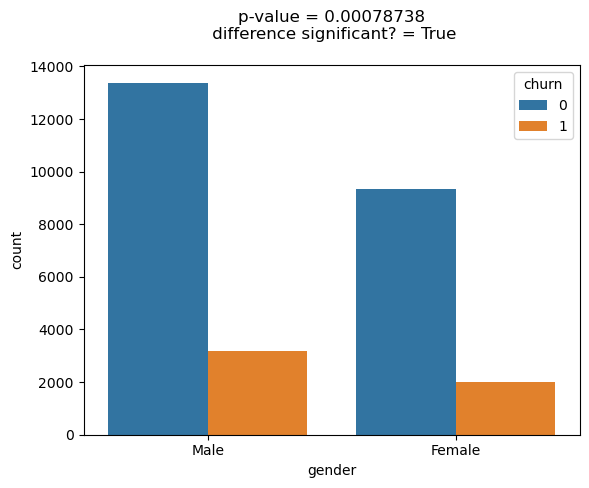

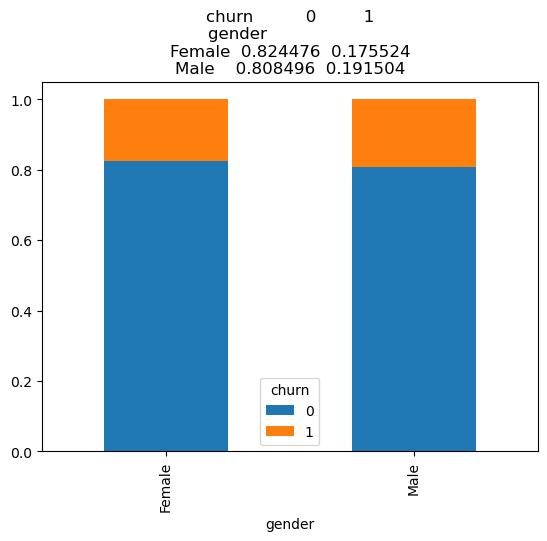

In [6]:
BVA_categorical_plot(data, 'churn', 'gender')

**Result:**

the difference between the males and females customer churning is significant.

### 2. Are young customers more likely to churn?

In [18]:
churn = data[['churn', 'age']][:]

def age_group(x):
    if x >= 80:
        return 'very old'
    elif (x >= 60):
        return 'senior citizen'
    elif (x >= 18):
        return 'adult'
    else:
        return 'young'
    
churn['age_group'] = churn['age'].apply(lambda x: age_group(x))

In [19]:
churn[['age','age_group']]

age       age_group
0       66  senior citizen
1       35           adult
2       31           adult
3       90        very old
4       42           adult
...    ...             ...
28377   10           young
28378   34           adult
28379   47           adult
28380   50           adult
28381   18           adult

[28382 rows x 2 columns]

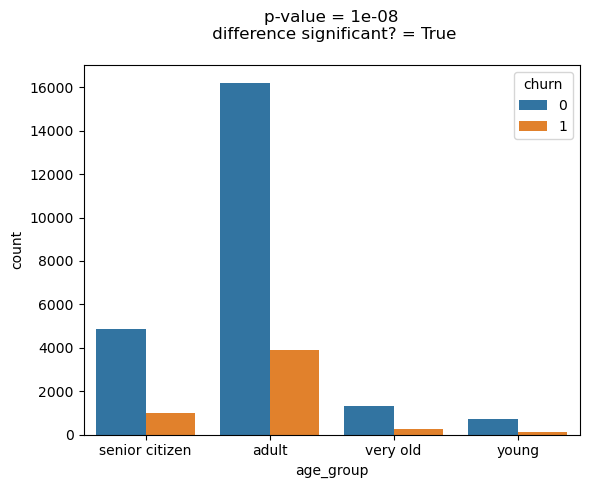

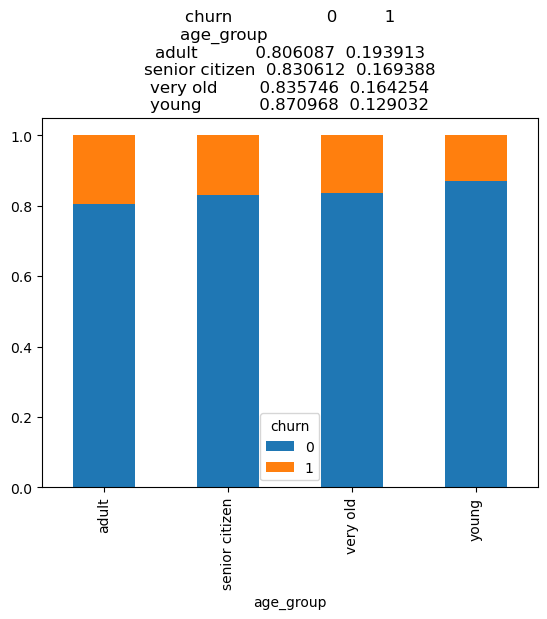

In [20]:
BVA_categorical_plot(churn, 'churn', 'age_group')

**Result**:
Age group has significant effect on the churning rate.

### 3. Customers from low income bracket more likely to churn

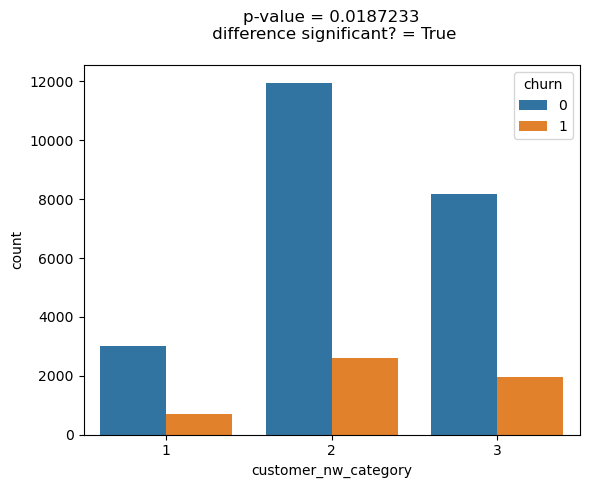

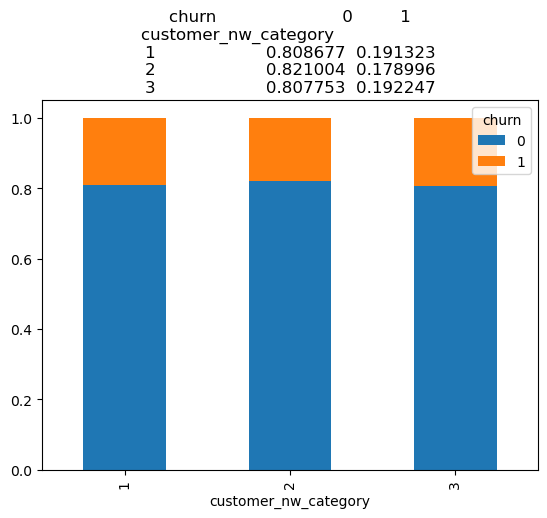

In [21]:
BVA_categorical_plot(data, 'churn', 'customer_nw_category')

**Result:**
Different income brackets have significant effect on the churn rate.

### 4,5. Are customers with dependent(s) less likely to churn?

In [22]:
dependents = data[['churn','dependents']][:]
dependents.dropna(inplace=True)

def family_group(x):
    if x == 0:
        return 'single'
    elif ((x >= 1) & (x <= 3)):
        return 'small family'
    elif ((x >= 4) & (x <= 9)):
        return 'large family'
    else:
        return 'joint family'

In [23]:
dependents['dep_group'] = dependents['dependents'].apply(lambda x: family_group(x))

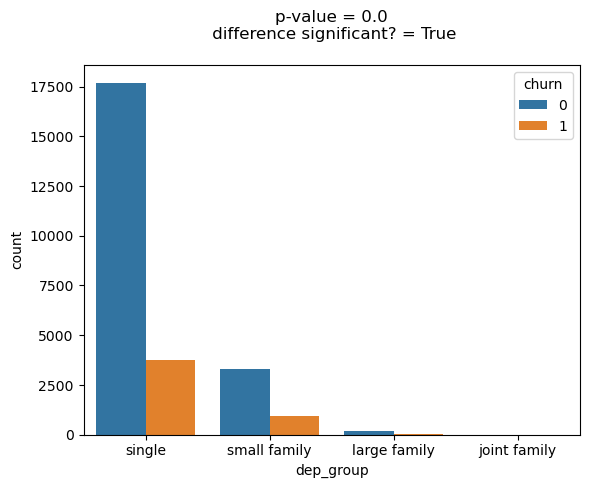

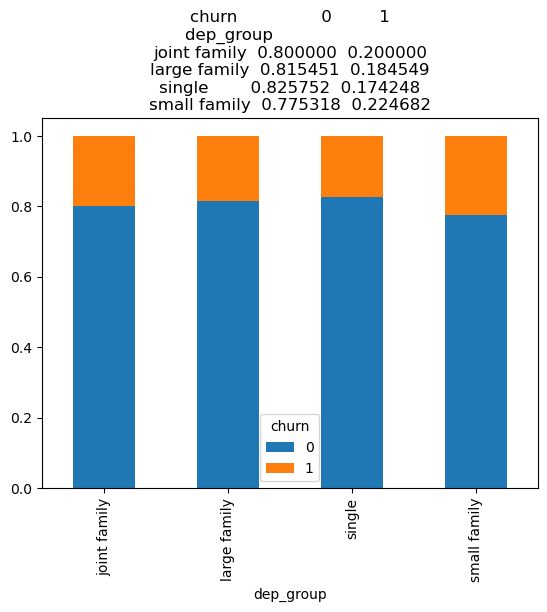

In [25]:
BVA_categorical_plot(dependents, 'churn', 'dep_group')

**Result:**

Number of dependents also play significant role in churning.

### 6. Customers whose last transaction was more than 6 months ago, they have a higher churn rate?

In [29]:
# segregating customers whose last transaction was more than 6 months ago
transaction = data[['churn','moy_last_trans']][:]
transaction['moy_last_trans'] = transaction['moy_last_trans'].map(lambda x: 'more than 6 months ago' if x<7 else 'within 6 months')

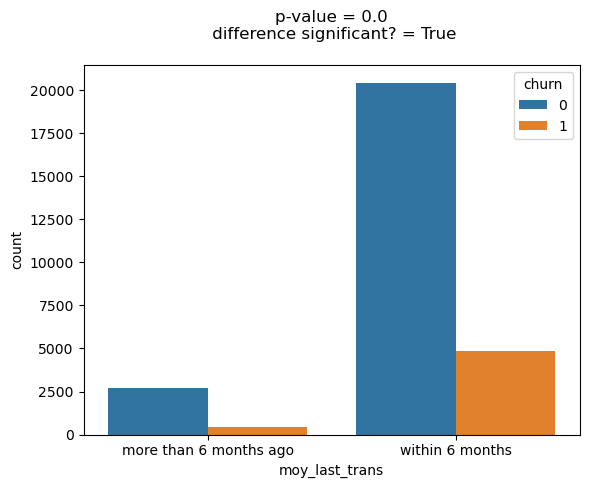

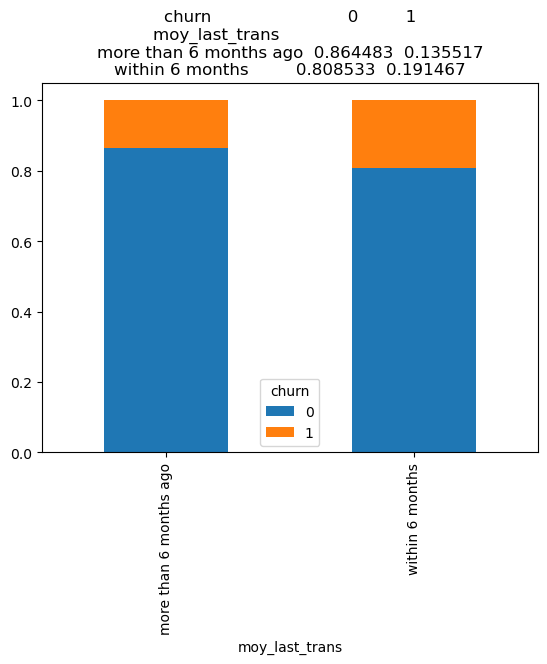

In [30]:
BVA_categorical_plot(transaction, 'churn', 'moy_last_trans')

**Result**

there is a significant difference between the people who made their last transaction in last 6 months and the customers who had their last transaction more than 6 months ago.

### 7. Possibility that cities and branch code with very few accounts may lead to churning.

In [31]:
# getting city codes which have less than 280 (1%) of accounts
tmp = data['city'].value_counts()
cities = tmp[tmp<280].index

In [32]:
churn_acc = data[['churn','city']][:]
churn_acc['city_cat'] = None

In [33]:
churn_acc.loc[churn_acc['city'].isin(cities[:]), 'city_cat'] = 'low accounts'
churn_acc.loc[~churn_acc['city'].isin(cities[:]), 'city_cat'] = 'high accounts'

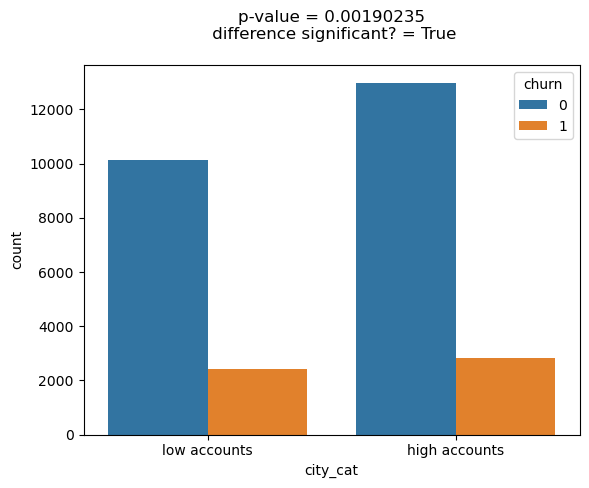

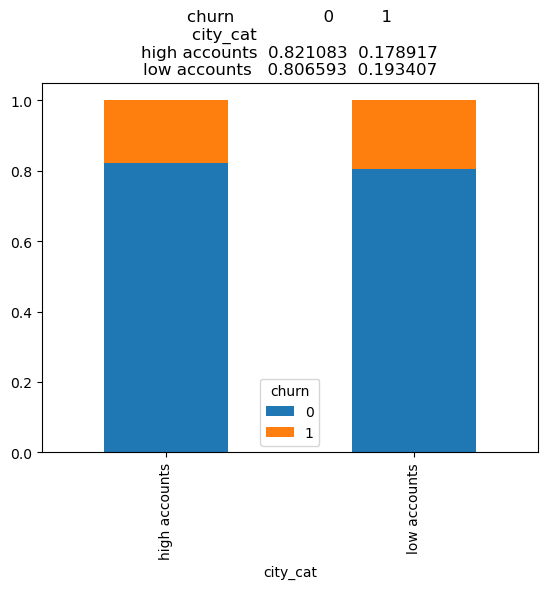

In [34]:
BVA_categorical_plot(churn_acc, 'churn', 'city_cat')

**Result**

cities having less than 1 percent of the total have significantly different churn rates as compared to the cities with more accounts.

In [35]:
# getting branch codes with more than 0.5% of total accounts
tmp = data['branch_code'].value_counts()[:]
branch = tmp[tmp<140].index

In [36]:
# making two segments
churn_acc = data[['churn','branch_code']][:]
churn_acc['branch_cat'] = None

In [37]:
churn_acc.loc[churn_acc['branch_code'].isin(branch[:]), 'branch_cat'] = 'low accounts'
churn_acc.loc[~churn_acc['branch_code'].isin(branch[:]), 'branch_cat'] = 'high accounts'

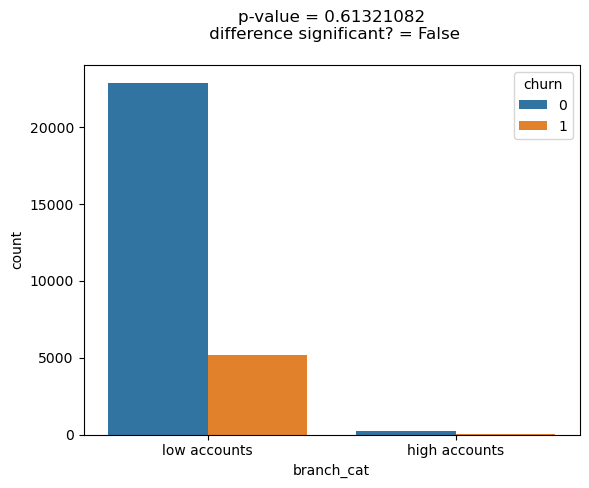

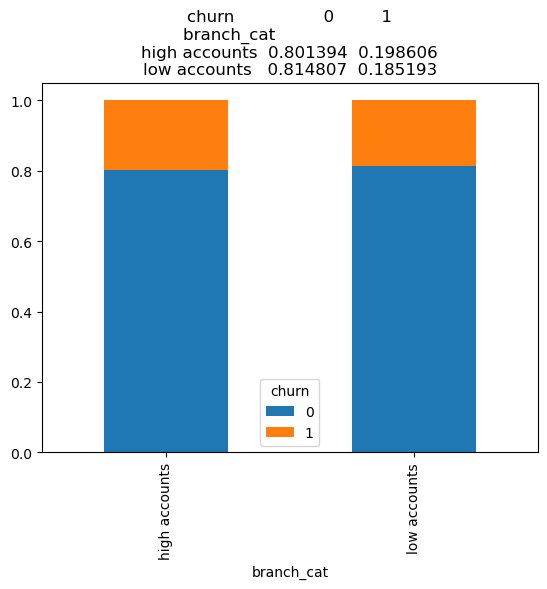

In [38]:
BVA_categorical_plot(churn_acc, 'churn', 'branch_cat')

**Resilt:**

There is no significant difference between the high account count branches and low account count branches.

### Missing Values- Gender

In [39]:
# isolating rows with missing gender
miss_gender = data[:]
miss_gender.loc[:, 'missing_gender'] = 'not_missing'
miss_gender.loc[~miss_gender['gender'].isin(['Male','Female']), 'missing_gender'] = 'missing value'

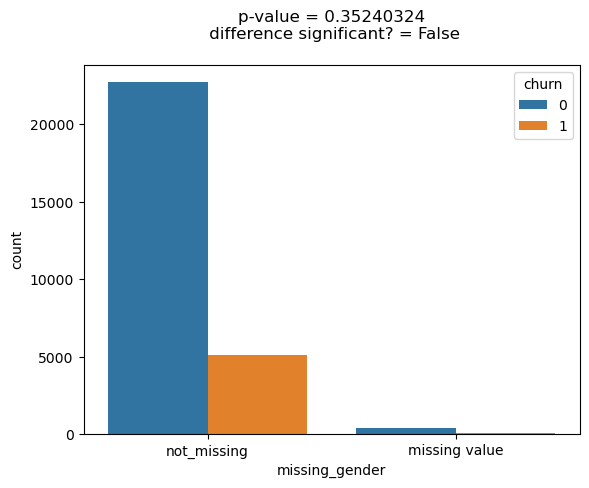

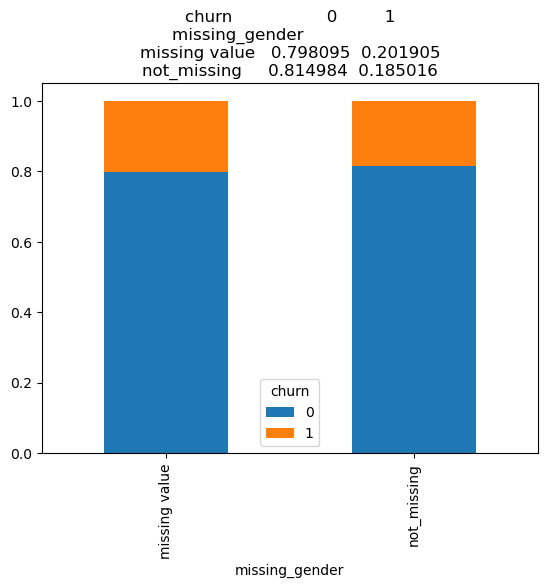

In [40]:
BVA_categorical_plot(miss_gender, 'churn', 'missing_gender')

**There is no diffrent behaviour of the missing values in gender wrt target**


### Missing values : Dependents

In [41]:
# isolating rows with missing gender
miss_dependents = data[:]
miss_dependents['missing_dependents'] = 'not_missing'
miss_dependents.loc[~miss_dependents['dependents'].isin([0, 2, 3, 1, 7, 4, 6, 5, 9, 52, 36,50,8,25,32]),
                                                                'missing_dependents'] = 'missing value'

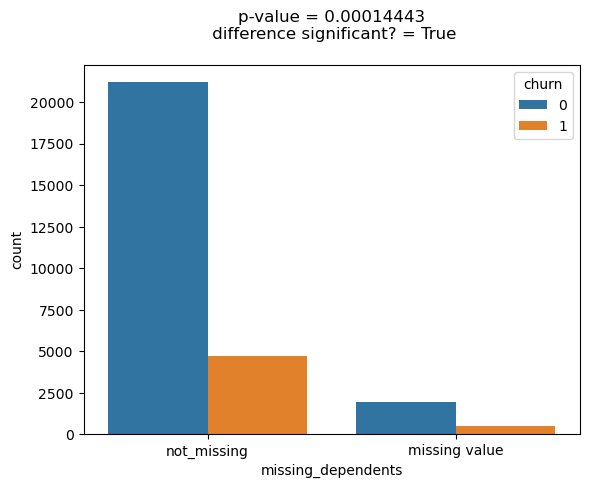

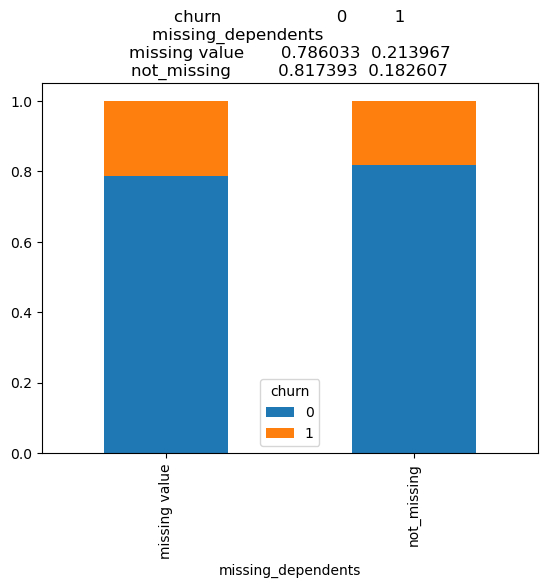

In [42]:
BVA_categorical_plot(miss_dependents, 'churn', 'missing_dependents')

Missing values in dependents have significantly different churning rate than the rest of the data.

### Missing values : Occupation

In [43]:
# isolating rows with missing gender
miss_occupation = data[:]
miss_occupation['missing_occupation'] = 'not_missing'
miss_occupation.loc[~miss_occupation['occupation'].isin(['self_employed', 'salaried', 'retired', 'student',
                                                    'company']), 'missing_occupation'] = 'missing value'

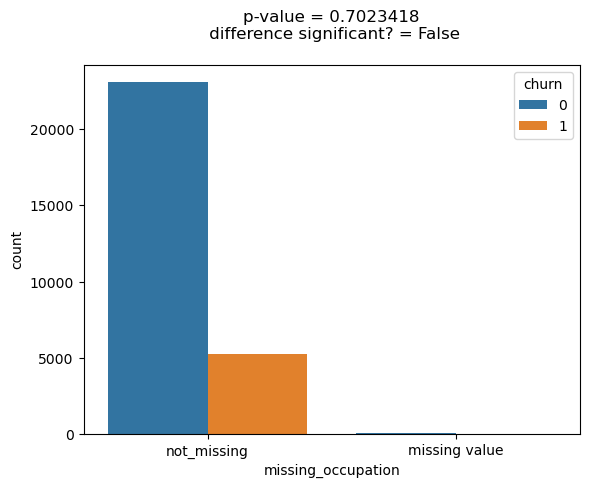

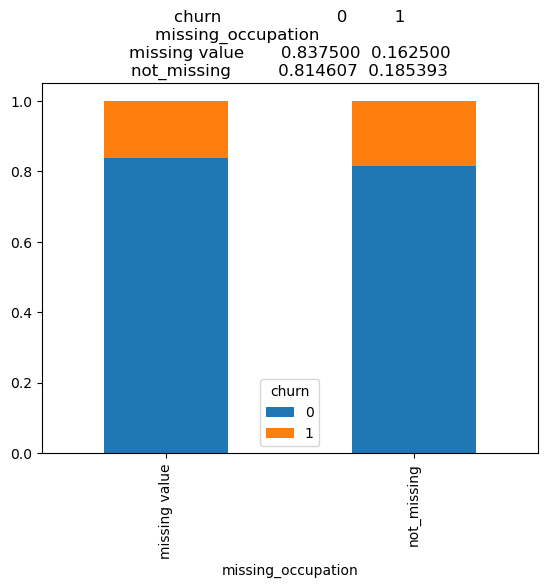

In [44]:
BVA_categorical_plot(miss_occupation, 'churn', 'missing_occupation')

Missing values in occupation does not have any significantly different relation with churn rate.

## Multivariate analysis

### Pivot table- Gender, Occupation, Customer Net worth category with Churn

In [45]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='sum')

customer_nw_category    1    2    3
gender occupation                  
Female company          1    0    2
       retired         12   23   17
       salaried        51  128  124
       self_employed  211  761  512
       student         18   79   43
Male   company          0    0    0
       retired         32  120  101
       salaried        92  395  357
       self_employed  237  942  700
       student         28   95   61

In [46]:
data.pivot_table('churn', ['gender', 'occupation'], 'customer_nw_category', aggfunc='mean')*100

customer_nw_category           1          2          3
gender occupation                                     
Female company        100.000000   0.000000  66.666667
       retired         20.689655  11.219512  13.492063
       salaried        18.545455  14.849188  17.689016
       self_employed   18.111588  18.197035  18.920916
       student         10.404624  14.442413  15.034965
Male   company          0.000000   0.000000   0.000000
       retired         18.497110  14.251781  16.316640
       salaried        17.557252  16.410469  18.468702
       self_employed   22.832370  20.424978  21.465808
       student         16.969697  17.210145  18.208955

* __Highest number of churning customers__ are those __Male Customers__ who lie in __2 net worth category__ and belong to __Self-employed__ profession
* Proportion wise for net worth category 1, Approximately 22% __Male customers__ who belong to the __Self-employed__ profession are churning
* Proportion wise for net worth category 2, 20% __Male customers__ who belong to the __Self-employed__ profession are churning
* For net worth category 3, Approximately 21% __Male customers__ who belong to the __Self-employed__ profession are churning

* In all the cases of Customer net worth category, __Self-employed Male customers__ are more likely to churn

* This would be interesting to dig deeper and find out if the __"Self-employed Male"__ Customers are more churning more

### Gender, Age, Occupation with Churning Status

Let's use one continuous variable Age, and two categorical variables, Gender, and Occupation to derive insights related to profiles of customers who are churning.
We will have to convert continuous variable into categorical variable for efficiently using Pivot Table. Here we are binning age into three intervals

In [47]:
age = pd.cut(data['age'], [0, 25, 50, 100])
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='sum')

occupation        company  retired  salaried  self_employed  student
gender age                                                          
Female (0, 25]          0        0         7             27      102
       (25, 50]         2        0       226            852       38
       (50, 100]        1       52        70            605        0
Male   (0, 25]          0        0        17             74      137
       (25, 50]         0        2       563           1107       47
       (50, 100]        0      251       264            698        0

In [50]:
data.pivot_table('churn', ['gender', age], 'occupation', aggfunc='mean')*100

occupation        company    retired   salaried  self_employed    student
gender age                                                               
Female (0, 25]        NaN        NaN  15.909091      21.774194  13.421053
       (25, 50]      50.0   0.000000  16.096866      19.163293  15.510204
       (50, 100]     50.0  13.541667  17.948718      17.370083   0.000000
Male   (0, 25]        0.0        NaN  20.987654      30.327869  16.545894
       (25, 50]       0.0  14.285714  17.349769      21.886121  21.076233
       (50, 100]      0.0  15.493827  17.165150      19.340538   0.000000

* We have created three bins for the age variable dividing age into 3 groups 0-25, 25-50 and 50-100
* Highest number of Customers are churning from __Male category__ who belong to the age group of __(25,50)__ and are professionally __self employed__
* Highest Proportion of Customers are churning from __Male category__ who belong to the age group of __(0,25)__ and are professionally __self employed__
* Here also __Self Employed Male customers__ are churning more than any other combination of categories


### Gender,Age,Occupation and Current Balance with Churning Status

Let's dig deeper by using two continuous variables Age and Current Balance and Two Categorical Variable Gender and Occupation and try to find out the insights related to churning customers profile

In [51]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='sum')

current_balance  (-5503.961, 2202.177]                                         \
occupation                     company retired salaried self_employed student   
gender age                                                                      
Female (0, 25]                       0       0        5            22      64   
       (25, 50]                      1       0      146           522      20   
       (50, 100]                     1      34       45           353       0   
Male   (0, 25]                       0       0       12            52      95   
       (25, 50]                      0       0      328           694      30   
       (50, 100]                     0     156      150           364       0   

current_balance  (2202.177, 5114.317]                                         \
occupation                    company retired salaried self_employed student   
gender age                                                                     
Female (0, 25]                      0       0        1             4      21   
       (25, 50]                     1       0       51           171       7   
       (50, 100]                    0       8       14           125       0   
Male   (0, 25]                      0       0        4            12      20   
       (25, 50]                     0       1      129           208      10   
       (50, 100]                    0      39       52           143       0   

current_balance  (5114.317, 5905904.03]                                         
occupation                      company retired salaried self_employed student  
gender age                                                                      
Female (0, 25]                        0       0        1             1      17  
       (25, 50]                       0       0       29           159      11  
       (50, 100]                      0      10       11           127       0  
Male   (0, 25]                        0       0        1            10      22  
       (25, 50]                       0       1      106           205       7  
       (50, 100]                      0      56       62           191       0

In [52]:
balance = pd.qcut(data['current_balance'], 3)
data.pivot_table('churn', ['gender', age], [balance, 'occupation'], aggfunc='mean')*100

current_balance  (-5503.961, 2202.177]                                      \
occupation                     company    retired   salaried self_employed   
gender age                                                                   
Female (0, 25]                     NaN        NaN  26.315789     38.596491   
       (25, 50]                   50.0   0.000000  32.300885     33.677419   
       (50, 100]                 100.0  28.333333  35.156250     30.642361   
Male   (0, 25]                     0.0        NaN  35.294118     52.000000   
       (25, 50]                    0.0   0.000000  33.367243     38.901345   
       (50, 100]                   0.0  29.489603  32.119914     33.060854   

current_balance             (2202.177, 5114.317]                        \
occupation          student              company    retired   salaried   
gender age                                                               
Female (0, 25]    21.262458                  NaN        NaN   5.882353   
       (25, 50]   25.974026                100.0   0.000000   9.826590   
       (50, 100]   0.000000                  NaN   5.633803  11.200000   
Male   (0, 25]    28.189911                  NaN        NaN  14.285714   
       (25, 50]   44.117647                  0.0  16.666667  11.889401   
       (50, 100]        NaN                  0.0   6.927176  10.766046   

current_balance                           (5114.317, 5905904.03]             \
occupation       self_employed    student                company    retired   
gender age                                                                    
Female (0, 25]       10.810811   7.167235                    NaN        NaN   
       (25, 50]      10.891720   6.862745                    0.0        NaN   
       (50, 100]     11.052166        NaN                    0.0   8.196721   
Male   (0, 25]       14.117647   6.493506                    NaN        NaN   
       (25, 50]      13.214740  12.345679                    0.0  20.000000   
       (50, 100]     12.565905        NaN                    0.0  10.606061   

current_balance                                       
occupation         salaried self_employed    student  
gender age                                            
Female (0, 25]    12.500000      3.333333  10.240964  
       (25, 50]    6.697460     11.990950  16.666667  
       (50, 100]   8.029197     10.583333        NaN  
Male   (0, 25]     5.263158     16.949153  12.021858  
       (25, 50]    9.005947     12.058824   9.459459  
       (50, 100]  10.544218     13.941606   0.000000

* Current balance is divided into 3 quantiles
* It is visible at first look that for __low current balance__ more number of customers are churning
* For the first quantile of current balance, More than __18%__ (overall average churning) of customers are churning and for second and third quantile percentage of churning customers is less than 18%
* In first quantile of current balance, for __self employed profession__ as the age increases for customers, their churning proportion decreases. This means that __Young Self employed Customers__ are more prone to churn 
* There is a visible gap in proportion of Self employed females who lie in the age group of (0,25) and Self employed Males who lie in the same group. __Young Male Self employed customers__ are churning more than young female self employed customers

## Box Plot

Now in order to comply with our objective of identifying churning customers profile we will use grouped Box plot.

In [53]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v')
    plt.title('Boxplot')


### Age, Occupation, Churn

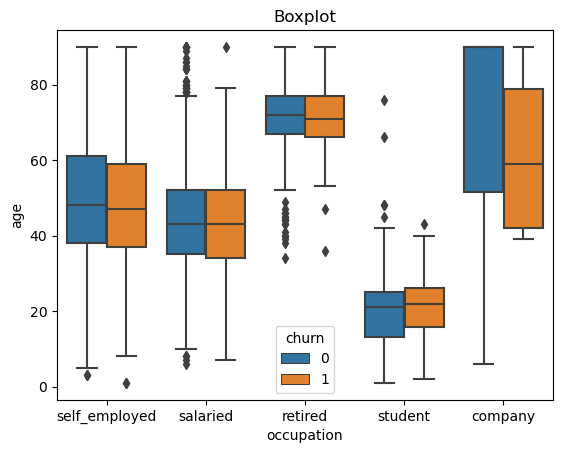

In [54]:
Grouped_Box_Plot(data,'age', 'occupation', 'churn')

We can notice here that 
* For __Self-employed__ profession churning customers are slightly __younger__ than non churning customers
* In the retired occupation for non churning customers, there are many outliers that indicate __young people who retire early are not churning__


### Vintage, Gender, Churn

It is also important to know the significance of vintage on churning profile of customers gender wise
So let't take Vintage and Gender to derive insights for churning customers

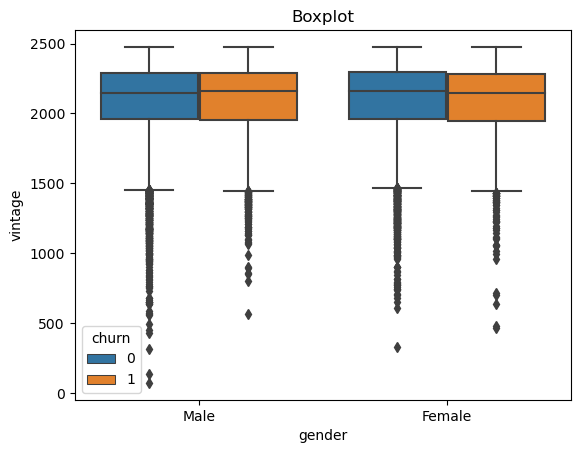

In [55]:
Grouped_Box_Plot(data,'vintage','gender', 'churn')

* There is __no visible difference__ in the vintage feature for genderwise churning and non churning customers


## Pair Plots

### Churn vs Current & Previous month balances

Now, we will check the relationship of the some transactional variables along with the churning status. Here conversion to log is important here as we have a lot of outliers and visualization will be difficult for it.

In [56]:
balance_cols = ['current_balance','previous_month_end_balance',
                'current_month_balance', 'previous_month_balance']
data1 = pd.DataFrame()

for i in balance_cols:
    data1[str('log_')+ i] = np.log(data[i] + 6000) #adding to make the value positive in order to take log

log_balance_cols = data1.columns

In [57]:
data1['churn'] = data['churn']

We will use the pairplot function from Seaborn which supports displaying relationship between multiple variables. It displays the scatter plot between a pair of feature and also displays the distribution

Here I have included the following:
* Log of current balance & previous month end balance
* Log of average monthly balance of current and previous month
* Churn is represented by the color here (Orange - Churn, Blue - Not Churn)

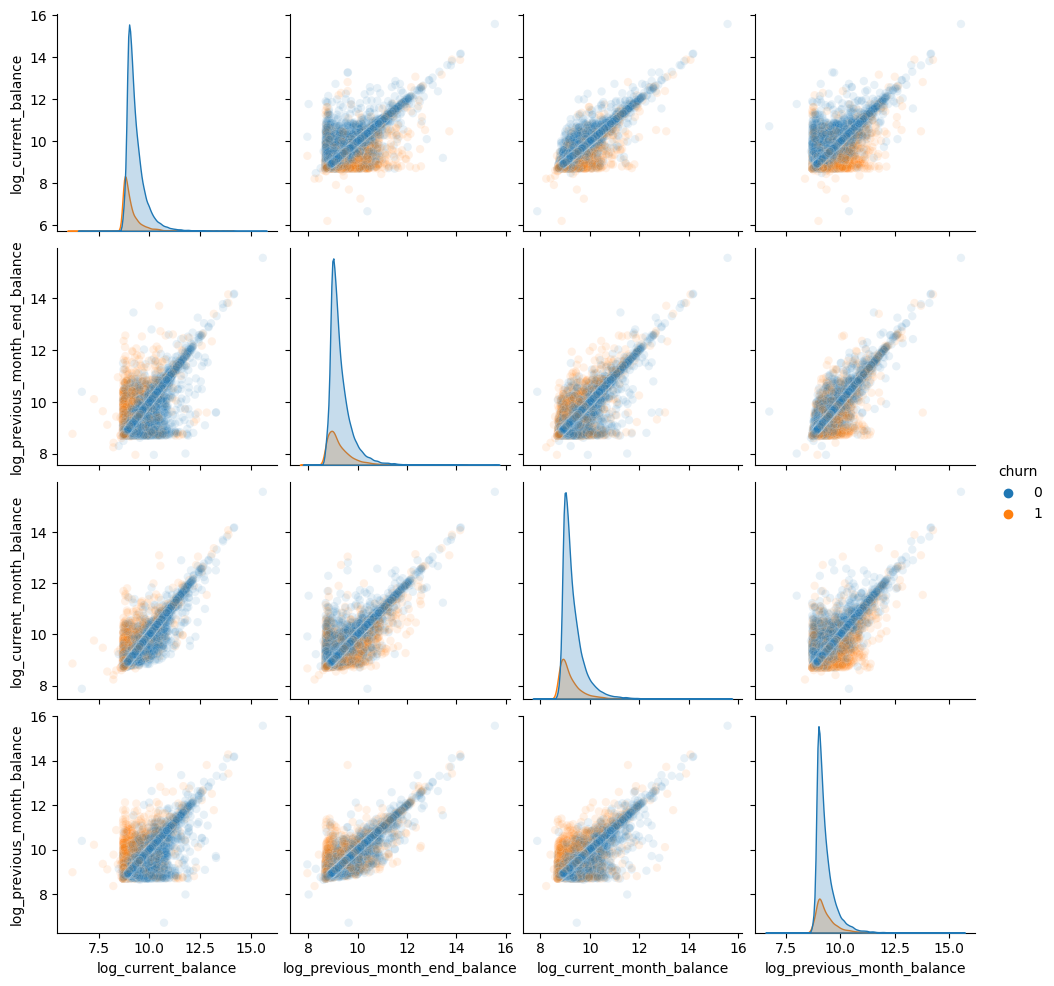

In [58]:
sns.pairplot(data1,vars=log_balance_cols,hue ='churn',plot_kws={'alpha':0.1})
plt.show()

### Credit and Debits for current and previous months

Total credit and debit amounts for the current and previous can be clubbed into the same category. Let us again use the pair plot to check distributions and scatter plots.

In [59]:
cr_dr_cols = ['current_month_credit','previous_month_credit', 
              'current_month_debit', 'previous_month_debit']
data1 = pd.DataFrame()

for i in cr_dr_cols:
    data1[str('log_')+ i] = np.log(data[i])

log_dr_cr_cols = data1.columns

In [60]:
data1['churn'] = data['churn']

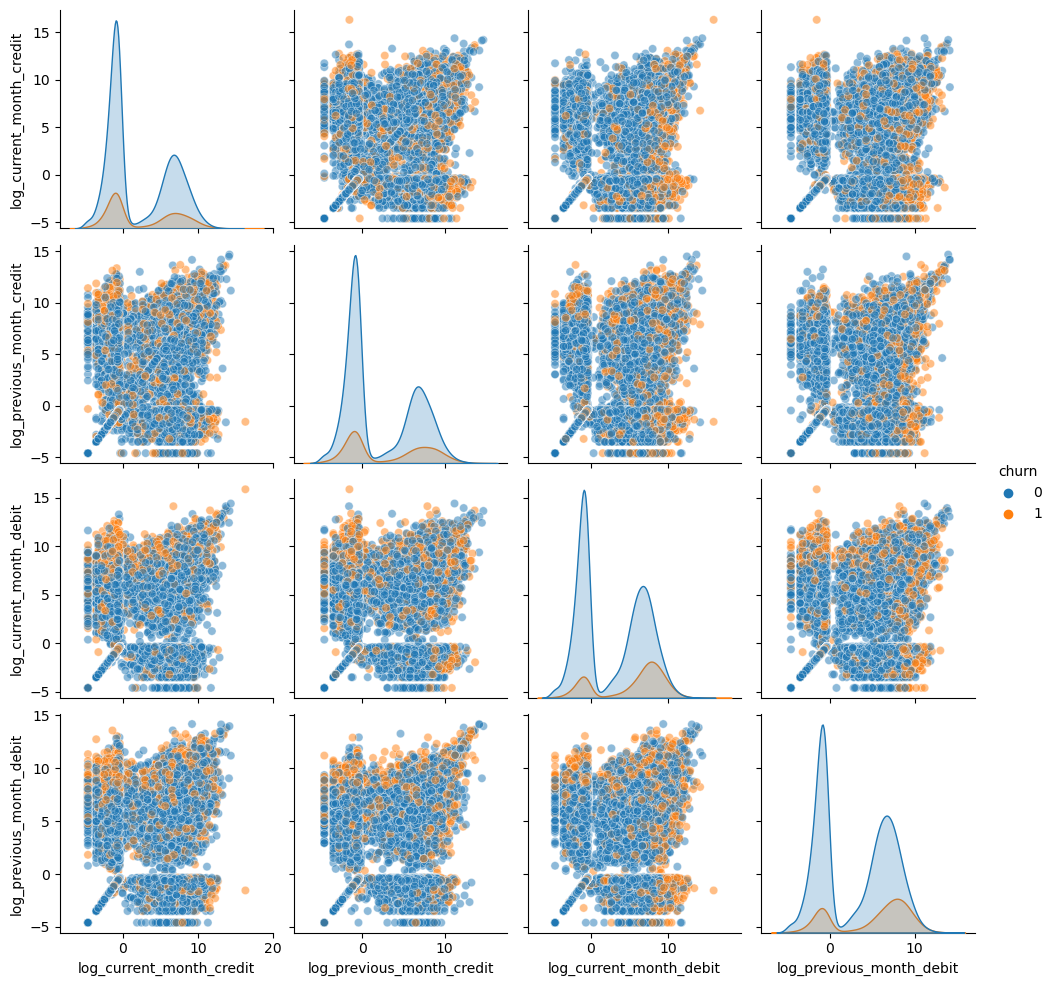

In [61]:
sns.pairplot(data1,vars=log_dr_cr_cols, hue = 'churn',plot_kws={'alpha':0.5})
plt.show()

Both credit and debit patterns show significant difference in distributions for churned and non churned customers.
* Bimodal distribution/Double Bell Curve shows that there are 2 different types of customers with 2 brackets of credit and debit. Now, during the modeling phase, these could be considered as a seperate set of customers
* For debit values, we see that there is a significant difference in the distribution for churn and non churn and it might turn out to be an important feature